<div style="border:solid Chocolate 2px; padding: 40px">

<b>Привет!👋</b>

Меня зовут Огурлиев Анзор, я буду ревьюером твоего проекта. Сразу хочу предложить тебе общаться на "ты", если тебе это неудобно, скажи мне об этом. Нам предстоит пройти с тобой через тернистый и от того интересный путь анализа данных! Можешь не переживать, я всегда помогу тебе, если у тебя возникнут вопросы)

По ходу твоей работы я буду оставлять свои комментарии, по выполненным тобой шагам. Попрошу тебя не удалять их, так мне будет проще отслеживать твой прогресс в случае повторной проверки.

Очень важно вести диалог и обсуждать те пункты, которые у тебя могли не получиться, поэтому, ты можешь оставлять свои комментарии, и мы обязательно во всем разберемся! Самое главное - выделяй свои комментарии удобным для тебя способом (цвет, рамка), но так, чтобы они отчетлитво отличались от моих комментариев. Так мы ни в чем не запутаемся)

Свои комментарии я буду выделять так: <font color='green'>зеленый</font>, <font color='gold'>желтый</font> и <font color='red'>красный</font> цвет, например:

<br/>

<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Этот комментарий я буду оставлять, если твое решение оптимально для данного шага.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Некоторые замечания и рекомендации💡:</b> Это не означает, что ты совершил ошибку. Такими комментариями я буду отмечать места, где ты справился с задачей, но её можно решить ещё лучше. Также в таких комментариях я буду оставлять для тебя другие советы.
</div>


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера V1<a class="tocSkip"></h2>


<b>На доработку🤔:</b>
Если решение, которое ты применил на определенном шаге, требует значительных изменений, то я буду оставлять такой комментарий. Тебе нужно будет подумать еще раз как правильным образом решить данный этап. Если ревью содержит такие комментарии, то я не смогу принять проект с первого раза.
</div>

P.S. В оглавлении комментария ты увидишь `V1` (`V1`, `V2`, `V3`) - это версия моего комментария, которая понадобится нам с тобой, чтобы не запутаться, если потребуется оставить тебе комментарии после первой проверки.

<div class="alert alert-info"> <b>Комментарий студента:</b>

Привет.👋 
    
Отлично давай на ты.</div>


# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Молодец, что начинаешь проект с описания!

## Откроем файл с данными и изучим общую информацию

In [8]:
import pandas as pd
try:
    #локальный доступ из той же папки где тетрадь
    df = pd.read_csv('real_estate_data.csv', sep='\t')
except:
     #общедоступный доступ к файлу
    df = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

In [9]:
df.info() #общий осмотр вводной

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Итак, в таблице 21 столбца. Тип данных во всех столбцах — различается, поправим.

Название столбца `cityCenters_nearest` - поправим

Согласно вводным данным:

`irports_nearest` — расстояние до ближайшего аэропорта в метрах (м)\
`balcony` — число балконов\
`ceiling_height` — высота потолков (м)\
`cityCenters_nearest` — расстояние до центра города (м) - стоит привести к змеиному стилю\
`days_exposition` — сколько дней было размещено объявление (от публикации до снятия)\
`first_day_exposition` — дата публикации\
`floor` — этаж\
`floors_total` — всего этажей в доме\
`is_apartment` — апартаменты (булев тип)\
`kitchen_area` — площадь кухни в квадратных метрах (м²)\
`last_price` — цена на момент снятия с публикации\
`living_area` — жилая площадь в квадратных метрах (м²)\
`locality_name` — название населённого пункта\
`open_plan` — свободная планировка (булев тип)\
`parks_around3000` — число парков в радиусе 3 км\
`parks_nearest` — расстояние до ближайшего парка (м)\
`ponds_around3000` — число водоёмов в радиусе 3 км\
`ponds_nearest` — расстояние до ближайшего водоёма (м)\
`rooms` — число комнат\
`studio` — квартира-студия (булев тип)\
`total_area` — общая площадь квартиры в квадратных метрах (м²)\
`total_images` — число фотографий квартиры в объявлении\
Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.

<div class="alert alert-info"> <b>Комментарий студента:</b>
Про пропуски что еще следует добавить тогда как в отдельном отделе их еще раскрываю.</div>

array([[<Axes: title={'center': 'total_images'}>,
        <Axes: title={'center': 'last_price'}>,
        <Axes: title={'center': 'total_area'}>,
        <Axes: title={'center': 'rooms'}>],
       [<Axes: title={'center': 'ceiling_height'}>,
        <Axes: title={'center': 'floors_total'}>,
        <Axes: title={'center': 'living_area'}>,
        <Axes: title={'center': 'floor'}>],
       [<Axes: title={'center': 'kitchen_area'}>,
        <Axes: title={'center': 'balcony'}>,
        <Axes: title={'center': 'airports_nearest'}>,
        <Axes: title={'center': 'cityCenters_nearest'}>],
       [<Axes: title={'center': 'parks_around3000'}>,
        <Axes: title={'center': 'parks_nearest'}>,
        <Axes: title={'center': 'ponds_around3000'}>,
        <Axes: title={'center': 'ponds_nearest'}>],
       [<Axes: title={'center': 'days_exposition'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

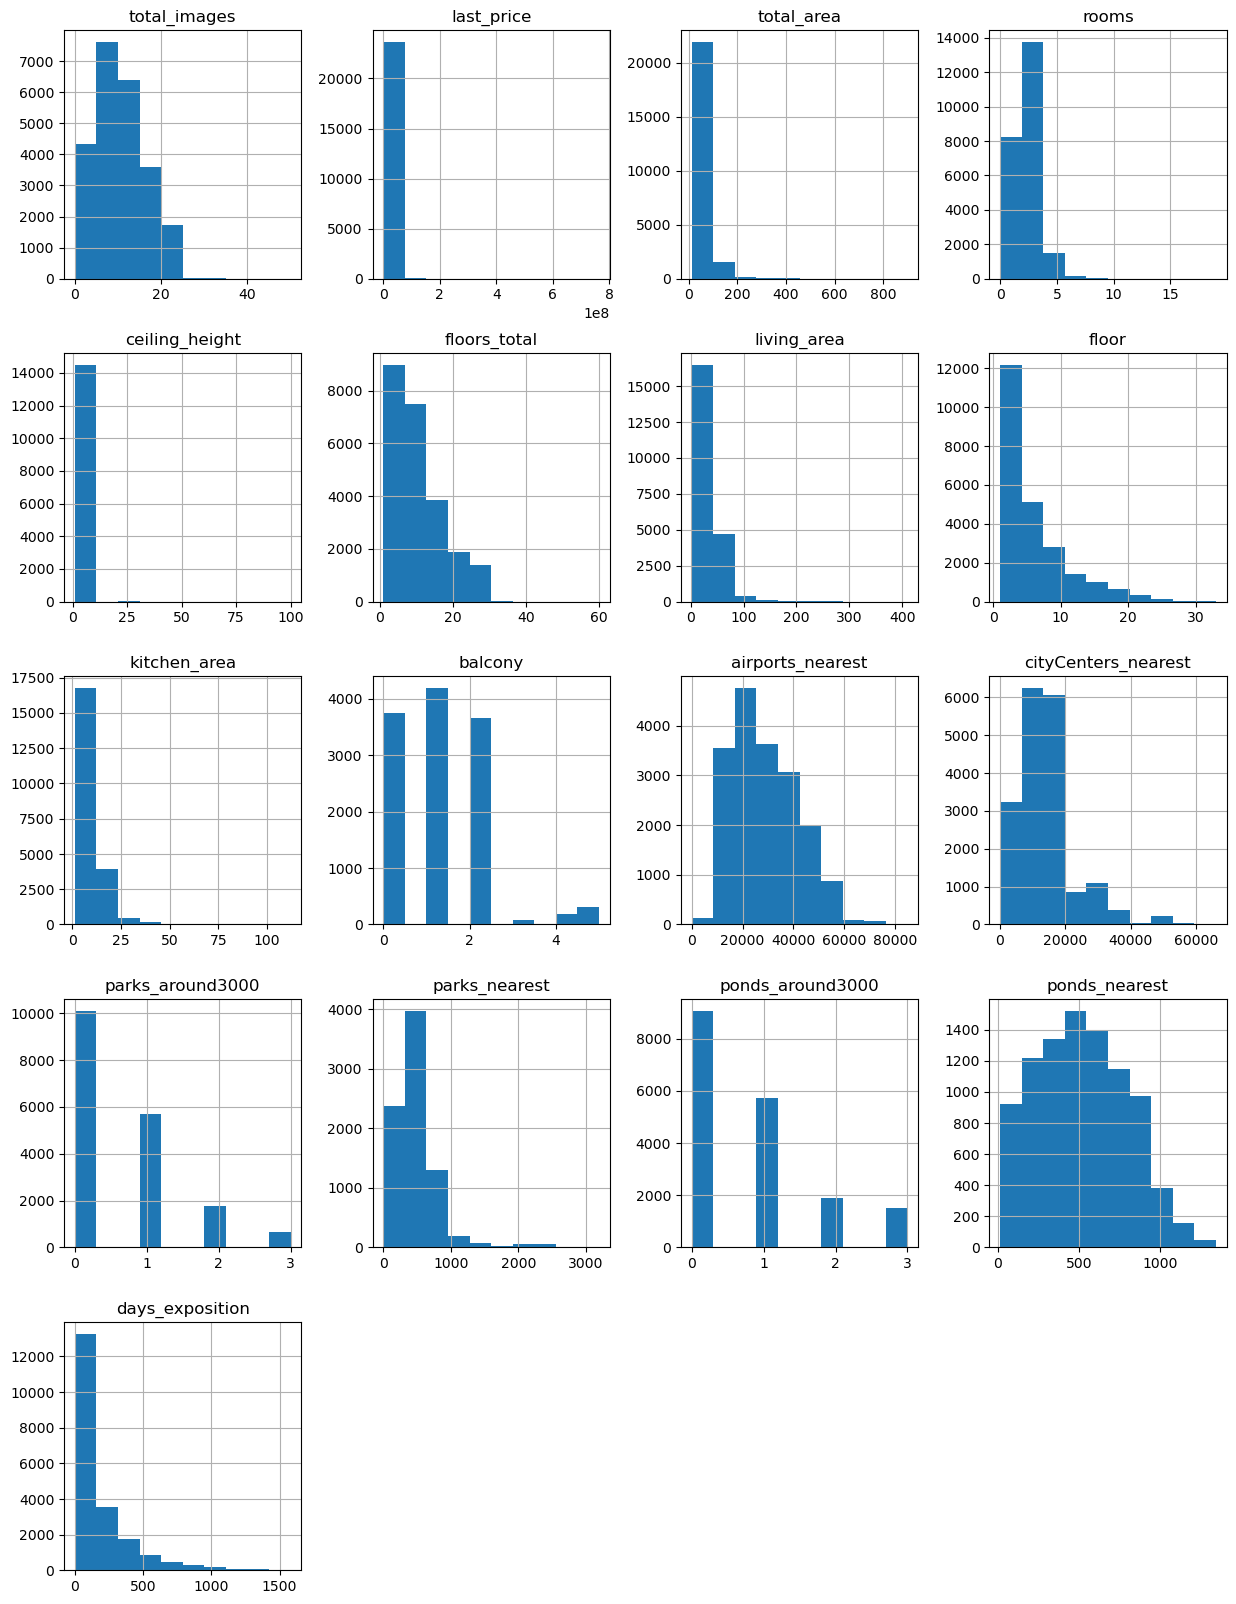

In [10]:
df.hist(figsize=(15, 20)) #Посмотрим на все сверху ()_()

<div class="alert alert-warning">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Некоторые замечания и рекомендации💡:</b> После того, как ты рассмотрел данные, стоит составить их краткое описание: количество пропусков, типы распределений.

<div class="alert alert-info"> <b>Комментарий студента:</b>

Хорошее замечание.

Поискал про типы распределений, вики дает математические формулы а визуально нашел такой справочник.

Подскажешь для работы аналитика в каком ресурсе прочитать подробнее

Например про Парето знаю давно 20/80 но как его вычислять тут в питоне еа практике</div>

<div class="alert alert-warning">
<h2> Комментарий ревьюера V2<a class="tocSkip"> </h2>

<b>Некоторые замечания и рекомендации💡:</b> Я какого-то одного источника со всеми типами не встречал, основные только в ходе обучения постепенно узнавал.
    
Так ведь их не надо вычислять, ты строить гистограмму с помощью метода hist() и смотришь на распределение, скошенное оно или нет и тд.

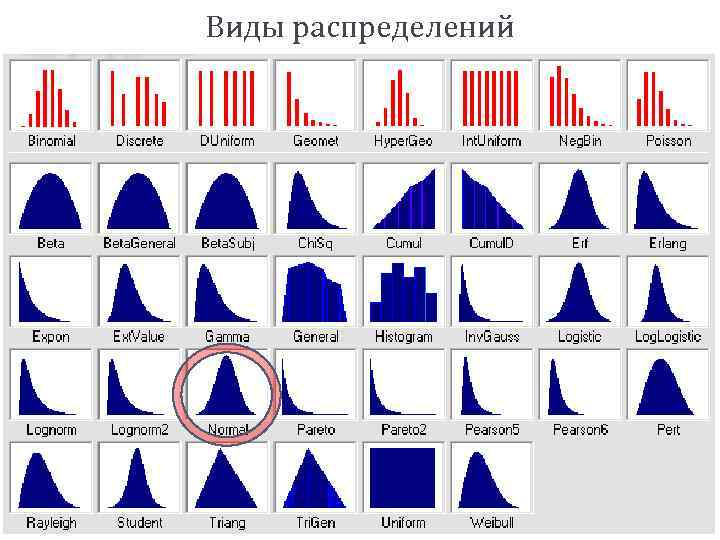

## Выполним предобработку данных


## Определим, в каких столбцах есть пропуски.

In [11]:
df = df.rename(columns={'cityCenters_nearest': 'city_centers_nearest'}) # переименование столбца
df.columns # проверка результатов

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [12]:
df.isna().sum() #еще раз все пропуски отдельно

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Поступлю с ними вот так:

Высота потолков - важный фактор если у вас не стандартная высота она увеличит привлекательность обьявления, если же у вас стандартные 2,5 м решают не показывать этот параметр, поэтому пропуски заменю  на 2,5 стандарт массовой застройки

Количество этажей в доме - всего 86 пропусков, избавимся от них.

Жилая пощадь - важный показатель, заплню его медианой с распределением по количеству комнат, проверим как асто медиана превысит общую площадь, для проверки.

Апартаменты - их будут отмечать в случае если это дейсвительно так, в противном и не заметят этот параметр, проставлю везде False

Площадь кухни - заполн. по медиане, стандарт для квартиры студии 5 м.кв. (у нас в городе у всех застройщиков на плане так и написано)

Число балконов - соответственно поставлю 0

Название населенного пункта - 49 всего, удалю, не повлияет на статистику

Показатели расстояния до Аэропорта , центра, парка и водоема, заменить на данные после анализа возможно после более детальных рассчетов и те могут не соответсвовать действительности и исказить иследование, следует обратится к исправлению ошибки сохранения и сбора данных геосервиса.

Дата размещения - предположу что это еще не закрытые обьявления проверим во время анализа.


|наименование | перевод | количество пропусков | необходимо заполнение или замена|
|-|-|-|-|
|ceiling_height | высота потолков (м) | 9195 | заменить на 2,5+
|floors_total|всего этажей в доме|86| не значительные пропуски, удалить если влияют на расчет+
|living_area|жилая площадь в квадратных метрах (м²)|1903| проверить количество комнат заменить на площадь по медиане +
|is_apartment|апартаменты (булев тип)|20924| значит нет заполнить как не апартаменты+
|kitchen_area| площадь кухни в квадратных метрах (м²)|2278| проверить количество комнат заменить на площадь по медиане+
|balcony|число балконов|11519| заменить на 0+
|locality_name|название населённого пункта|49| удалить если влияет, маленькое количество данных+
|airports_nearest| расстояние до ближайшего аэропорта в метрах (м)|5542| требуется проверка работы геосервиса
|city_centers_nearest|расстояние до центра города (м)|5519| требуется проверка работы геосервиса
|parks_around3000|число парков в радиусе 3 км|5518| требуется проверка работы геосервиса
|parks_nearest| расстояние до ближайшего парка (м)|15620| требуется проверка работы геосервиса
|ponds_around3000| число водоёмов в радиусе 3 км|5518| требуется проверка работы геосервиса
|ponds_nearest|расстояние до ближайшего водоёма (м)|14589| требуется проверка работы геосервиса
|days_exposition|сколько дней было размещено объявление (от публикации до снятия)|3181| проверить дату размещения, возможно ещё активные обьявления

### Анализ и заполнение пропусков

ceiling_height
2.50    3515
2.60    1646
2.70    1574
3.00    1112
2.80     993
        ... 
5.00       1
2.20       1
2.34       1
3.93       1
3.59       1
Name: count, Length: 183, dtype: int64


<Axes: >

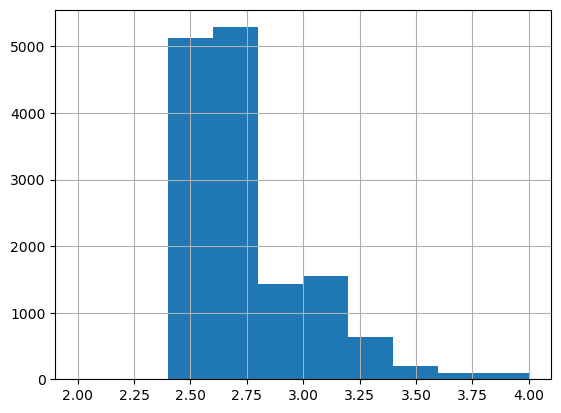

In [13]:
print(df['ceiling_height'].value_counts()) #посмотрю на высоту с высоты~
df['ceiling_height'].describe() #цифры по массиву данных
df['ceiling_height'].hist(bins=10, range=(2,4)) #визуализируем этот массив

In [14]:
df['ceiling_height'] = df['ceiling_height'].fillna(2.5) #заполним стандартным 2,5
df['ceiling_height'].isna().sum() #проверю

0

<div class="alert alert-warning">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Некоторые замечания и рекомендации💡:</b> Лучше заполнить пропуски медианой, чем константой, тем более ты зачем то вставляешь строку, а не число.

<div class="alert alert-info"> <b>Комментарий студента:</b>

Согласен, исправил. глупая ошибка </div>

<div class="alert alert-warning">
<h2> Комментарий ревьюера V2<a class="tocSkip"> </h2>

<b>Некоторые замечания и рекомендации💡:</b> Это не совсем ошибка, так как ты потом типы меняешь все равно.

<AxesSubplot:>

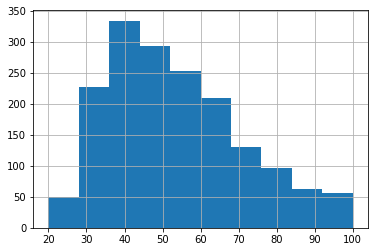

In [8]:
#посмотрю в каких обьявлениях не указана жилая площадь, может это только студии
living_area_nan = df.loc[df['living_area'].isna()] 
living_area_nan['total_area'].hist(range=(20,100)) #

<AxesSubplot:>

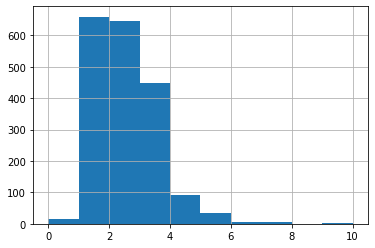

In [9]:
living_area_nan['rooms'].hist(range=(0,10)) #и проверка относительно количества комнат

Пропущены значения в квартирах с большой площадью и большим количеством комнат, следует заменить пропуски медианым значением согласно количеству жилых комнати

In [10]:
#функция сгруппирует и посчитает мдиану жилой площади по квартирам с разным количеством комнат и подставит её

for t in df['rooms'].unique():
    df.loc[(df['rooms'] == t) & (df['living_area'].isna()), 'living_area'] = \
    df.loc[(df['rooms'] == t), 'living_area'].median()
df['living_area'].isna().sum() #проверим

0

<div class="alert alert-warning">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Некоторые замечания и рекомендации💡:</b> Пропуски в жилой площади и площади кухни можно заполнить исходя из значений общей площади. Эти параметры достаточно сильно коррелируют с общей площадью, поэтому можно посчитать отношения жилых площадей к общим, взять средний коэффициент отношения и с его помощью восстановить пропуски. Аналогично и площадь кухни. Так пропуски получится заполнить более точным образом, чем медианой.

<div class="alert alert-info"> <b>Комментарий студента:</b>

Интересно,

Понимаю что если отношение 

`total_area` к `living_area` будет например 0.8 

то при аналогичном `total_area` подставить значение `total_area` * 0.8

как написать такую функцию?

    
</div>

<div class="alert alert-warning">
<h2> Комментарий ревьюера V2<a class="tocSkip"> </h2>

<b>Некоторые замечания и рекомендации💡:</b> 
    
Пример ниже:
    
`df['living_area'] = df['living_area'].fillna(df['total_area'] * (df['living_area'] / df['total_area']).mean())`

In [20]:
df[df['living_area'] > df['total_area']]

#29 квартир где больше чем общая площадь 


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [21]:
df['is_apartment'] = df['is_apartment'].fillna(False) #просто квартиры обычные квартиры в частных руках 
df['is_apartment'].isna().sum() #проверю

0

<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Все верно

In [22]:
kitchen_area_nan = df.loc[df['kitchen_area'].isna()] #поступим так же как с жилой площадью

In [23]:
#функция сгруппирует и посчитает мдиану кухонной площади по квартирам с разным количеством комнат и подставит её
for k in df['rooms'].unique():
    df.loc[(df['rooms'] == k) & (df['kitchen_area'].isna()), 'kitchen_area'] = \
    df.loc[(df['rooms'] == k), 'kitchen_area'].median()
df['kitchen_area'].isna().sum() #проверю

197

In [24]:
#остались не заполнены строки
kitchen_area_nan = df.loc[df['rooms'] == 0] #студии могут не нести информацию о кухни, а сколько их 
len(kitchen_area_nan)

197

Данные полностью совпадают как по логике функции так и по проверке данных - остались квартиры студии

In [25]:
df['kitchen_area'] = df['kitchen_area'].fillna('5') #поставим на их место 5 стандартных метров от застройщика, кухонный уголок
df['kitchen_area'].isna().sum()

0

In [26]:
df['balcony'] = df['balcony'].fillna('0')  #если нет балкона то и писать про него не будут
df['balcony'].isna().sum()

0

In [27]:
#переведу формат в datetime
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S') 

days_exposition_nan = df.loc[df['days_exposition'].isna()] #вывестду списки отдельно для просмотра

In [28]:
#теория о том что это последние и еще не проданные объявления можно проверить
print(days_exposition_nan['first_day_exposition'].min(), days_exposition_nan['first_day_exposition'].max())

2014-11-27 00:00:00 2019-05-03 00:00:00


In [29]:
df = df.dropna(subset=['locality_name', 'floors_total']) #удалю 0,5 % данных 

<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Верное решение удалить объявления с пропусками в этих параметрах, их достаточно мало и на анализ это никак не повлияет.

In [30]:
df.isna().sum() #Еще одна проверка, общая

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1865
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
city_centers_nearest     5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

Причины появления пропусков в данных:и какие пропуск были

График и данные показали что больше всех стандартных потолков с высотой 2,5, заполнил проск ей.причина не заполнения, нет необходимости заполняьт самы что ни есть старндартное значение.

Пропуски в жилой площади не связаны с квартирами студиями и открытими пространствами, оник как большинство имеют разные площади и количество комнат, заполнили медианой пропуски, лишь 29 из списка где одщая площадь оказалась меньше, для анализа слишком маленткая выборка. Жилую площадь спустя моного лет могут не знать или не представлять из чегоона складывается.(предложить подсказку на сайт с расчетом площади)

Площадь кухни так же под заполнение медианной, кроме небольших жилых площадей где с большой вероятностью кухна как часть комныты расположена на 5 м.кв. Не внимательность и незнание, без деьального плана помещений привело в пропуски в данных

Балконы списаны. причина отсутствия информации = отсутствие балкона

Пропуск информации в данных о днях размещения объявления показал что это могут бытьобъявления с интнрвалом до 5 лет, при необходимости иследования буду принимать решения о удалении этих пустых ячеек со сторками

Оставлю данные с пропусками для более точного анализа с имеющим масивом

### Изменить тип данных

In [31]:
df['is_apartment'] = df['is_apartment'].astype('bool') #лучше `bool` чем `object`

In [32]:
df['ceiling_height'] = pd.to_numeric(df['ceiling_height'], errors='raise') #нам тут понадобятся значения в числах

In [33]:
df['kitchen_area'] = pd.to_numeric(df['kitchen_area'], errors='raise') #нам тут понадобятся значения в числах

In [34]:
df['balcony'] = df['balcony'].astype('int') #нам тут понадобятся значения в числах

In [35]:
df['locality_name'] = df['locality_name'].astype(str) #что бы не было проблем с `object`

In [36]:
df.info() #проверим

<class 'pandas.core.frame.DataFrame'>
Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  float64       
 7   living_area           21700 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony              

С тимом `object` не полусится построить графики и правильный срез данных.

Так же при обращении к зачкнию `bool` функции работают.

навести порядок перед постройкой анализа все же стоит.

<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Типы данных обработал правильно, молодец!

### Дубликаты

In [37]:
df.duplicated().sum() #проверю явные дубликаты

0

Одинаковых строк в данных нет. Могут быть дубликаты в наименовании населенных пунктов 

In [38]:
sorted(df['locality_name'].unique()) #все уникальные наименования

['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское',
 'городск

Повторяются одинаковые населенные пункты, а именно поселки с е и ё, станции и пгт напиманы по разному но это одни и теже места.

Заменю ё на е и пока уберу все обозначения, оставив только само наименование, сортировка может показать опечатки в названии.

In [39]:
#для проверки гипотизы отдельная переменная с заменой ё на е и без типа населенного пункта.

locality_name_sort = df['locality_name']\
    .str.replace('ё', 'е')\
    .replace(
    ['деревня ',
     'коттеджный поселок ',
     'поселок при железнодорожной станции ',
     'поселок городского типа ',
     'поселок ',
     'садоводческое некоммерческое товарищество ',
     'садовое товарищество ',
     'село ',
     'городской ',
     'имени ',
     'станции '], '', regex=True)
sorted(locality_name_sort.unique())

['Агалатово',
 'Александровская',
 'Алексеевка',
 'Аннино',
 'Аро',
 'Барышево',
 'Батово',
 'Бегуницы',
 'Белогорка',
 'Белоостров',
 'Бокситогорск',
 'Большая Вруда',
 'Большая Ижора',
 'Большая Пустомержа',
 'Большие Колпаны',
 'Большое Рейзино',
 'Большой Сабск',
 'Бор',
 'Борисова Грива',
 'Бугры',
 'Будогощь',
 'Ваганово',
 'Важины',
 'Вартемяги',
 'Вахнова Кара',
 'Вещево',
 'Виллози',
 'Вознесенье',
 'Возрождение',
 'Войсковицы',
 'Войскорово',
 'Володарское',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Вырица',
 'Выскатка',
 'Высокоключевой',
 'Высоцк',
 'Гаврилово',
 'Гарболово',
 'Гатчина',
 'Гладкое',
 'Глажево',
 'Глебычево',
 'Глинка',
 'Гончарово',
 'Горбунки',
 'Гостилицы',
 'Громово',
 'Дзержинского',
 'Дружная Горка',
 'Дружноселье',
 'Дубровка',
 'Елизаветино',
 'Ефимовский',
 'Жилгородок',
 'Жилпоселок',
 'Житково',
 'Заводской',
 'Заклинье',
 'Заневка',
 'Запорожское',
 'Зеленогорск',
 'Зимитицы',
 'Ивангород',
 'Извара',
 'Ильичево',
 'Иссад',
 'Калитино',

Прверка показала что в наименовании дублей нет в основнjv DF так же поменяю ё на е и поправлю `городской поселок` и `поселок станции`

In [40]:
df['locality_name'] = df['locality_name']\
    .str.replace('ё', 'е')\
    .replace(['городской поселок '], 'поселок городского типа ', regex=True)\
    .replace(['поселок станции '], 'поселок при железнодорожной станции ', regex=True) 

#df['locality_name'].sort_values().unique()
sorted(df['locality_name'].unique())

['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалево',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'деревня Агалатово',
 'деревня Аро',
 'деревня Батово',
 'деревня Бегуницы',
 'деревня Белогорка',
 'деревня Большая Вруда',
 'деревня Большая Пустомержа',
 'деревня Большие Колпаны',
 'деревня Большое Рейзино',
 'деревня Большой Сабск',
 'деревня Бор',
 'деревня Борисова Грива',
 'деревня Ваганово',
 'деревня Вартемяги',
 'деревня Вахнова Кара',
 'деревня Выскатка',
 'деревня Гарболово',
 'деревня Глинка',
 '

<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Неявные дубликаты обработаны абсолютно верно!

## Добавлю в таблицу новые столбцы

In [41]:
df['price_one_meter'] = round(df['last_price']/df['total_area'], 2) #цена одного квадратного метра

In [42]:
df['day_week_pbl'] = df['first_day_exposition'].dt.weekday #день недели публикации объявления

In [43]:
df['month_pbl'] = df['first_day_exposition'].dt.month #месяц публикации объявления

In [44]:
df['year_pbl'] = df['first_day_exposition'].dt.year #год публикации объявления

In [45]:
#необходима функция которая проверит какой этаж, если первый то выдаст `первый` 
#если не первыйй то соответствует ли `последниму` или же это `другой`
def type_floor(floor,t_floor): 
        if floor == 1:
            return 'первый'
        elif 1 != floor == t_floor:
            return 'последний'
        else:
            return 'другой'
   

df['floor_type'] = df.apply(lambda x: type_floor(x.floor, x.floors_total), axis=1)


df[['floors_total', 'floor','floor_type']].head(20) #проверю применяемую логику

,floors_total,floor,floor_type
0,16.00,8,другой
1,11.00,1,первый
2,5.00,4,другой
3,14.00,9,другой
4,14.00,13,другой
5,12.00,5,другой
6,26.00,6,другой
7,24.00,22,другой
8,27.00,26,другой
9,9.00,7,другой


In [46]:
df['city_centers_nearest_km'] = round(df['city_centers_nearest']/1000, 0) #растояние до центра переведены в КМ в целых числах

In [47]:
df.info() #проверю появившиеся столбцы

<class 'pandas.core.frame.DataFrame'>
Index: 23565 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   total_images             23565 non-null  int64         
 1   last_price               23565 non-null  float64       
 2   total_area               23565 non-null  float64       
 3   first_day_exposition     23565 non-null  datetime64[ns]
 4   rooms                    23565 non-null  int64         
 5   ceiling_height           23565 non-null  float64       
 6   floors_total             23565 non-null  float64       
 7   living_area              21700 non-null  float64       
 8   floor                    23565 non-null  int64         
 9   is_apartment             23565 non-null  bool          
 10  studio                   23565 non-null  bool          
 11  open_plan                23565 non-null  bool          
 12  kitchen_area             23565 non-nu

<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Новые столбцы создал правильно, подходящие методы использовал.

## Исследовательский анализ данных

 Посмотрю данные на наличие аномильных значений и подробно посмотрю каждый параметр.
 
 Изучены и описаны параметры:
 
 - [x] общая площадь;
 - [x] жилая площадь;
 - [x] площадь кухни;
 - [x] цена объекта;
 - [x] количество комнат;
 - [x] высота потолков;
 - [x] тип этажа квартиры («первый», «последний», «другой»);
 - [x] общее количество этажей в доме;
 - [x] расстояние до центра города в метрах;
 - [x] расстояние до ближайшего парка.

In [48]:
import matplotlib.pyplot as plt #для работы с графиками (в том числе гистограммами) импортирую библиотеку matplotlib
pd.set_option('display.float_format', lambda x: '%.2f' % x) #для отображения больших чисел цены
display(df.describe()) #взгляд сверху

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_meter,day_week_pbl,month_pbl,year_pbl,city_centers_nearest_km
count,23565.00,23565.00,23565.00,23565,23565.00,23565.00,23565.00,21700.00,23565.00,23565.00,...,18065.00,8030.00,18065.00,9036.00,20394.00,23565.00,23565.00,23565.00,23565.00,18064.00
mean,9.88,6540058.26,60.32,2017-11-10 08:59:53.125398016,2.07,2.67,10.68,34.45,5.88,10.41,...,0.61,490.58,0.77,518.29,180.74,99405.84,2.57,6.40,2017.37,14.19
min,0.00,12190.00,12.00,2014-11-27 00:00:00,0.00,1.00,1.00,2.00,1.00,1.30,...,0.00,1.00,0.00,13.00,1.00,111.83,0.00,1.00,2014.00,0.00
25%,6.00,3400000.00,40.00,2017-05-15 00:00:00,1.00,2.50,5.00,18.60,2.00,7.20,...,0.00,288.00,0.00,293.00,45.00,76566.13,1.00,3.00,2017.00,9.00
50%,9.00,4646000.00,52.00,2017-12-12 00:00:00,2.00,2.50,9.00,30.00,4.00,9.04,...,0.00,455.00,1.00,503.00,95.00,95000.00,3.00,6.00,2017.00,13.00
75%,14.00,6790000.00,69.70,2018-08-26 00:00:00,3.00,2.70,16.00,42.30,8.00,11.50,...,1.00,612.00,1.00,730.00,231.00,114213.20,4.00,10.00,2018.00,16.00
max,50.00,763000000.00,900.00,2019-05-03 00:00:00,19.00,100.00,60.00,409.70,33.00,112.00,...,3.00,3190.00,3.00,1344.00,1580.00,1907500.00,6.00,12.00,2019.00,66.00
std,5.68,10910934.72,35.66,NaN,1.08,1.00,6.59,22.05,4.87,5.66,...,0.80,341.57,0.94,278.01,219.73,50389.43,1.79,3.49,1.04,8.62


<div class="alert alert-warning">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Некоторые замечания и рекомендации💡:</b> Датафреймы и методы, их возвращающие, лучше выводить, или как переменную в отдельной ячейке, или с помощью метода display(). Метод print() выводит датафрейм в текстовом формате, из-за чего столбцы переносятся на разные строки.

<div class="alert alert-info"> <b>Комментарий студента:</b>

`display()` - вот про него это я забыл, 💡💡💡</div>

Да есть аномалии и не поддающиеся обьяснению данные, нужно расмотреть отдельно и скорректировать DF, анализ буду проводить в первоночальном массиве, корректировки перенесу в df_new

### Общая площадь `total_area`

,total_area
count,23565.00
mean,60.32
std,35.66
min,12.00
25%,40.00
50%,52.00
75%,69.70
max,900.00


<Axes: >

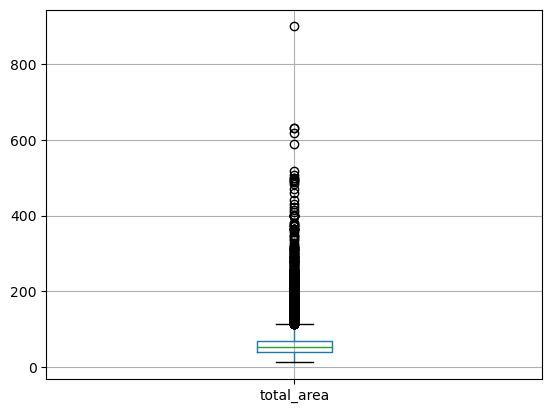

In [49]:
display(df[['total_area']].describe()) #еще раз вызову описптельную статистику для сопровождения разброса числами
df.boxplot('total_area') #столючатая диограмма для демонстрации квартилей и выбросов

Из этих данных посмотрю на гистограмме распределение количества значений так же выбросы в начале и конце

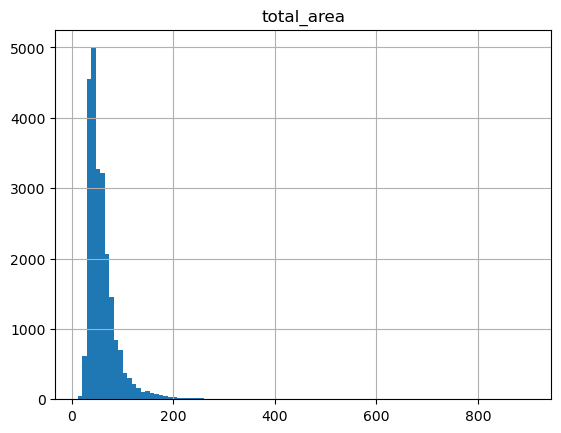

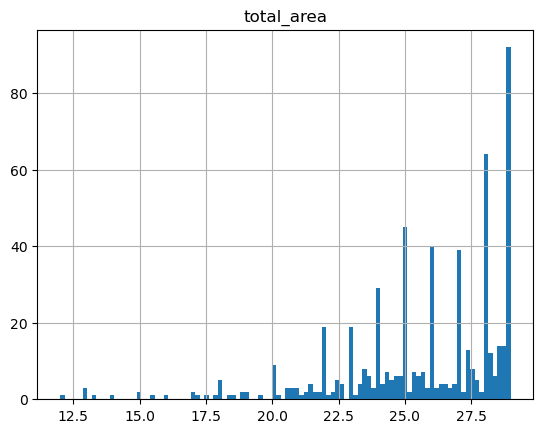

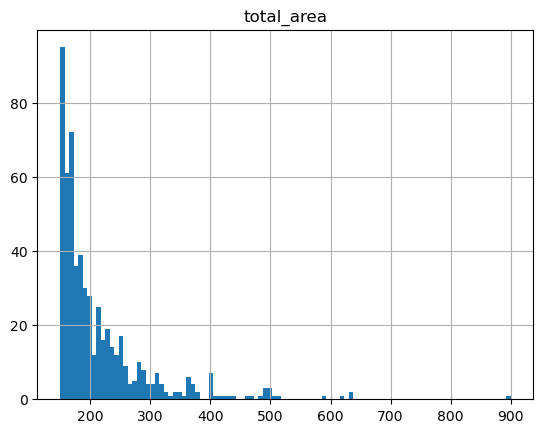

In [50]:
df[['total_area']].hist(bins=100, range=(12,900))
plt.show() 
df[['total_area']].hist(bins=100, range=(12,29))
plt.show() 
df[['total_area']].hist(bins=100, range=(150,900))
plt.show() 

array([[<Axes: title={'center': 'total_area'}>]], dtype=object)

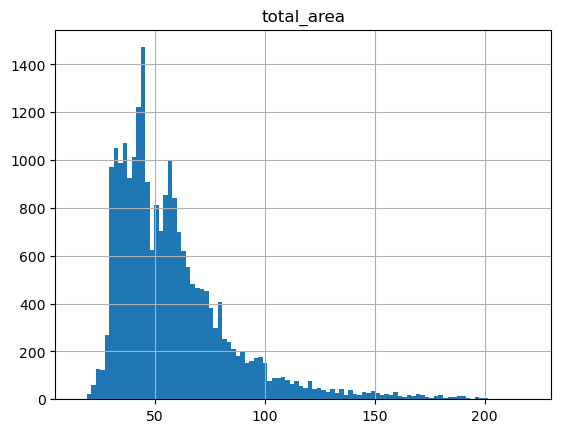

In [51]:
df_new = df[(df['total_area'] >= 20) & (df['total_area'] <= 200)]
df_new[['total_area']].hist(bins=100, range=(15,220))

Общая площадь вывод

В данных есть значения общей площади до 900 м.кв и минимальные 12 м.кв и их значения еденицы

Логично откинуть данные менее 20 м.кв их массив маленький и может принадлежать не стандартным предложениям на рынке.

Так же предложения свыше 200 м.кв. следует выделить в отдельный анализ данных как элитной недвижимости с моножеством других критериев оценки. до 200м.кв. могут попадать квартиры с большим количеством комнат и имеют высокий и наглядную динамику предложения на рынке.

похожа на распределение Пуассона и рациональный выбор.

### Жилая площадь  `living_area`

,living_area
count,21484.00
mean,33.27
std,17.37
min,2.00
25%,18.60
50%,30.00
75%,42.00
max,164.70


<Axes: >

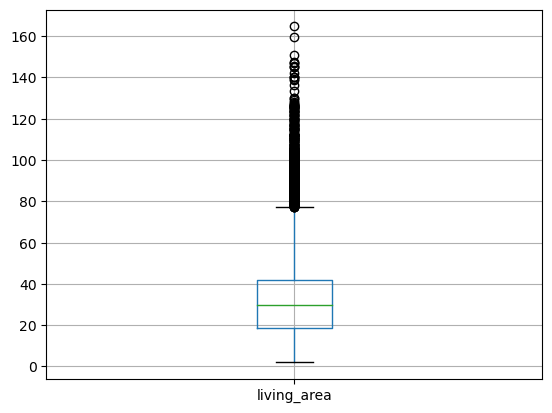

In [52]:
display(df_new[['living_area']].describe()) # ипользую уже переменную после удаления выбросов
df_new.boxplot('living_area')

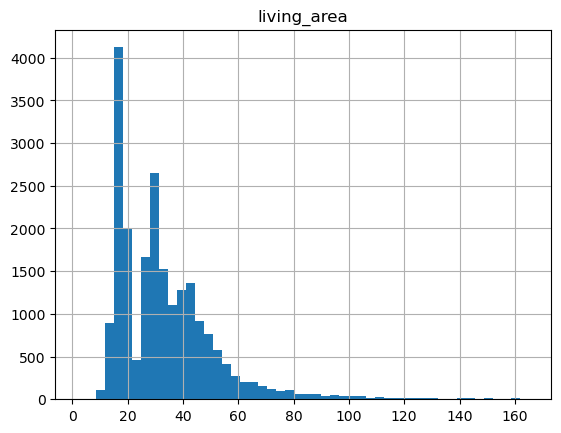

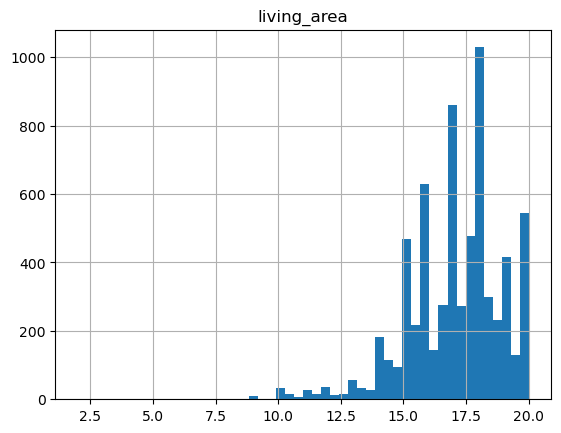

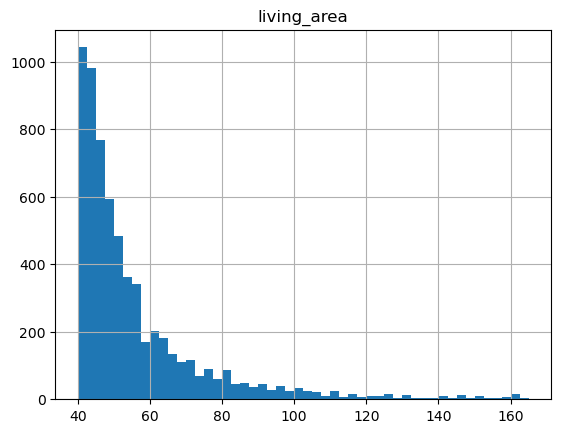

In [53]:
df[['living_area']].hist(bins=50, range=(2,165)) # гистограмма от min и до max значений
plt.show() 
df[['living_area']].hist(bins=50, range=(2,20)) # гистограмма от min и до Q1 значений
plt.show() 
df[['living_area']].hist(bins=50, range=(40,165)) # гистограмма от Q3 и до max значений
plt.show() 

array([[<Axes: title={'center': 'living_area'}>]], dtype=object)

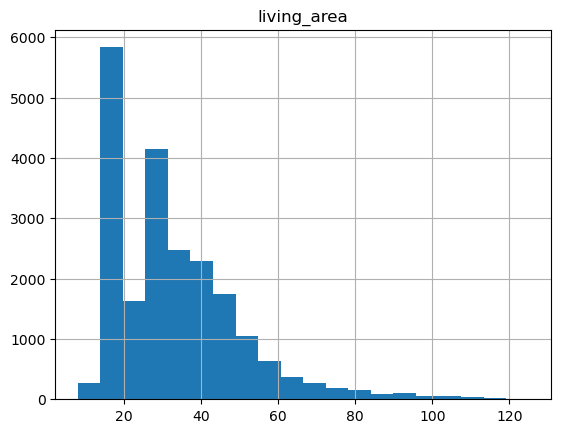

In [54]:
df_new = df_new[(df_new['living_area'] >= 9) & (df_new['living_area'] <= 120)]
df_new[['living_area']].hist(bins=20, range=(8,125))

Жилая площадь - вывод

Выбросы, что соответствуют так же слишком маленькой площади и очень большой которые могут принадлежать обьектам не стандартного предложения, отброшены.

Есть всплеск пл количеству данных на уровне медианных значений это результат заполнения пропусков в исходном файле, так же провал после 20 м.кв. скорее показывает переход от студий и 1-комнатных квартир к большему количеству комнат. 

Логично откинуть данные менее 20 м.кв их массив маленький и может принадлежать не стандартным предложениям на рынке.

### Площадь кухни `kitchen_area`

       kitchen_area
count      21420.00
mean          10.24
std            5.22
min            1.30
25%            7.00
50%            9.00
75%           11.50
max           93.20


<Axes: >

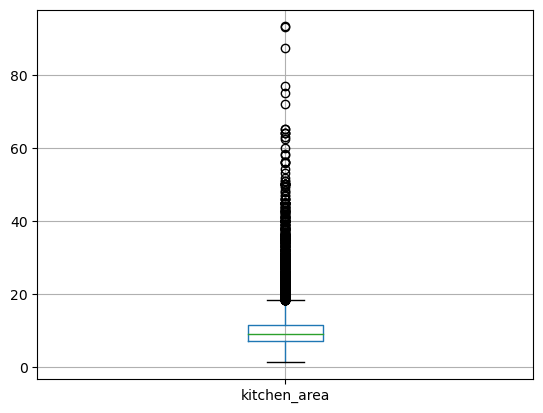

In [55]:
print(df_new[['kitchen_area']].describe())
df_new.boxplot('kitchen_area')

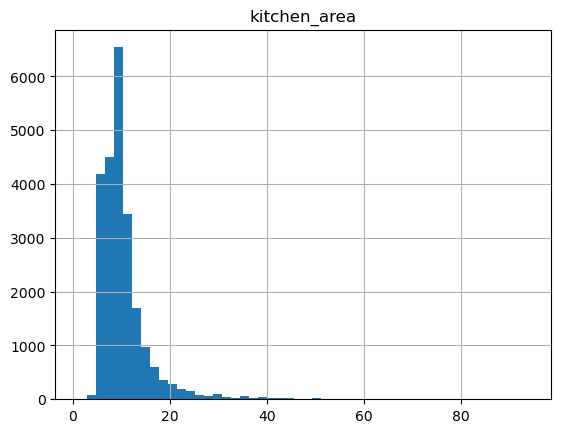

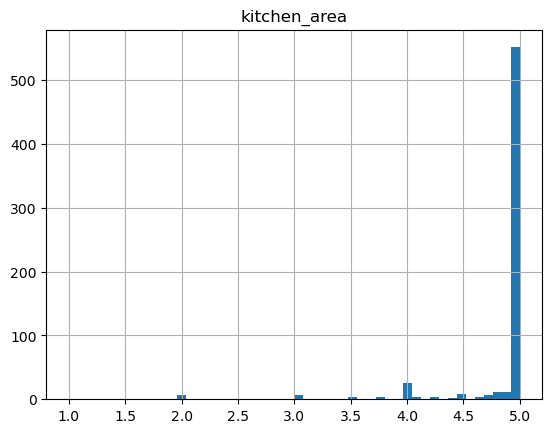

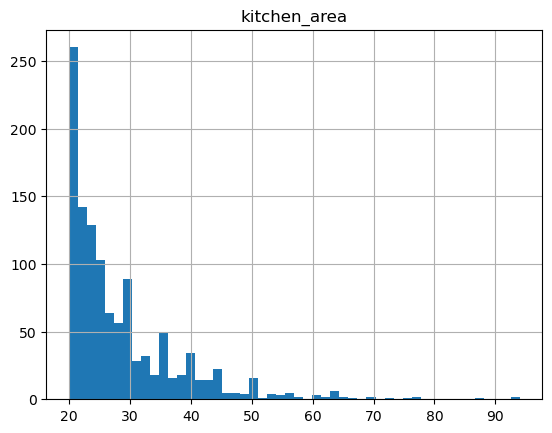

In [56]:
df[['kitchen_area']].hist(bins=50, range=(1,94))
plt.show() 
df[['kitchen_area']].hist(bins=50, range=(1,5))
plt.show() 
df[['kitchen_area']].hist(bins=50, range=(20,94))
plt.show() 

array([[<Axes: title={'center': 'kitchen_area'}>]], dtype=object)

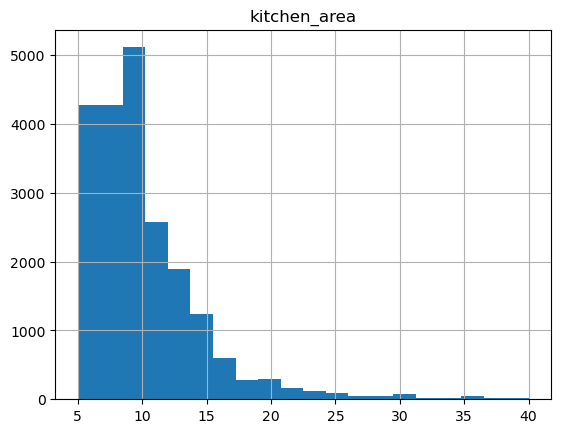

In [57]:
df_new = df_new[(df_new['kitchen_area'] >= 5) & (df_new['kitchen_area'] <= 40)]
df_new[['kitchen_area']].hist(bins=20, range=(5,40))

Площадь кухни - вывод

Выбросы, что соответствуют так же слишком маленькой площади и очень большой которые могут принадлежать обьектам не стандартного предложения, отброшены.

Похоже на распределение Пуассона и рациональный выбор. где площадь кухни от 5 до 40 м.кв. в общей площади квартир от 20 до 200 м.кв

### Цена объекта `last_price`

        last_price
count     21237.00
mean    5893804.07
std     5787099.32
min      430000.00
25%     3450000.00
50%     4600000.00
75%     6600000.00
max   330000000.00


<Axes: >

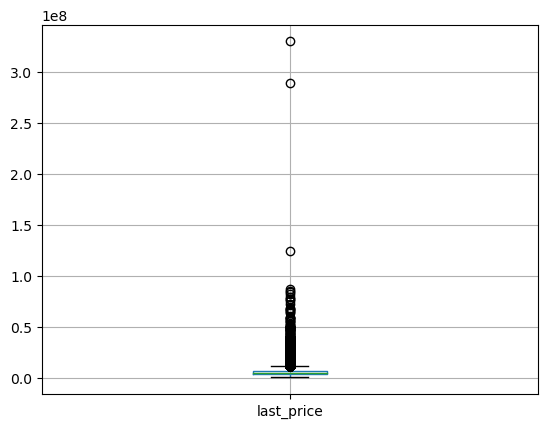

In [58]:
print(df_new[['last_price']].describe())
df_new.boxplot('last_price')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_meter,day_week_pbl,month_pbl,year_pbl,floor_type,city_centers_nearest_km
10011,3,53000000.00,90.00,2019-03-21,3,3.15,5.00,73.00,3,False,...,389.00,3.00,564.00,40.00,588888.89,3,3,2019,другой,2.00
7726,20,50000000.00,93.00,2019-04-18,2,2.50,7.00,40.00,4,False,...,160.00,3.00,569.00,NaN,537634.41,3,4,2019,другой,0.00
6462,2,82000000.00,114.00,2015-12-17,3,2.50,5.00,78.50,4,False,...,218.00,3.00,69.00,651.00,719298.25,3,12,2015,другой,3.00
13685,20,55845000.00,124.10,2015-12-28,2,2.50,9.00,50.00,2,False,...,679.00,1.00,227.00,378.00,450000.00,0,12,2015,другой,2.00
4996,20,124000000.00,124.50,2017-10-12,4,3.00,4.00,67.20,2,False,...,302.00,3.00,172.00,45.00,995983.94,3,10,2017,другой,2.00
1944,8,55800000.00,125.00,2015-12-17,2,3.20,9.00,50.00,2,False,...,545.00,1.00,478.00,481.00,446400.00,3,12,2015,другой,2.00
6388,16,51000000.00,126.00,2018-08-23,3,3.30,4.00,95.00,1,False,...,456.00,3.00,190.00,NaN,404761.90,3,8,2018,первый,7.00
22709,20,59000000.00,127.50,2016-12-21,4,3.00,12.00,85.00,8,False,...,84.00,3.00,234.00,635.00,462745.10,2,12,2016,другой,7.00
12223,20,59000000.00,127.50,2017-01-24,4,3.00,12.00,85.00,8,False,...,84.00,3.00,234.00,5.00,462745.10,1,1,2017,другой,7.00
2356,11,50000000.00,128.00,2016-06-24,3,2.50,9.00,42.00,1,False,...,625.00,1.00,283.00,27.00,390625.00,4,6,2016,первый,6.00


<Axes: xlabel='last_price', ylabel='total_area'>

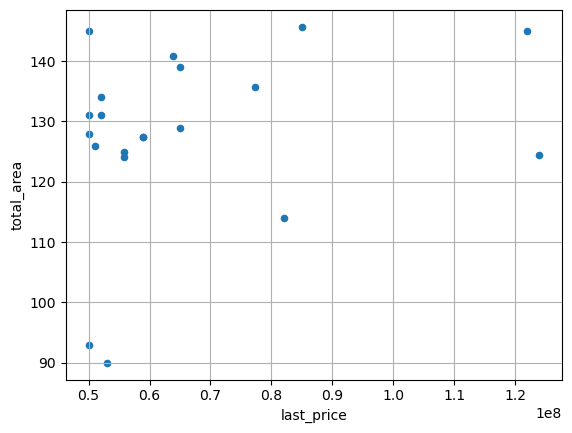

In [91]:
#высокие цены на квартиры могут быть результатом опечатки, соотнесу их с общей площадью
very_expensive = df.query('50000000 <= last_price <= 330000000').sort_values(by='total_area', ascending=True).head(20)
display(very_expensive)
very_expensive.plot(
    x='last_price', 
    y='total_area', 
    kind='scatter', 
    grid=True
)

Возможных опечаток сумм не наблюдается, высокие цены на жилье так же с большей площадью

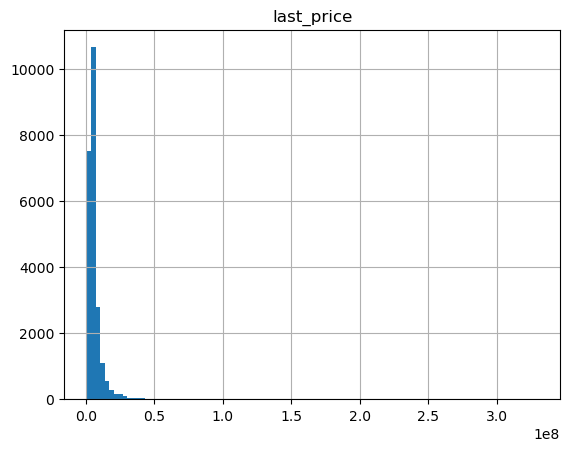

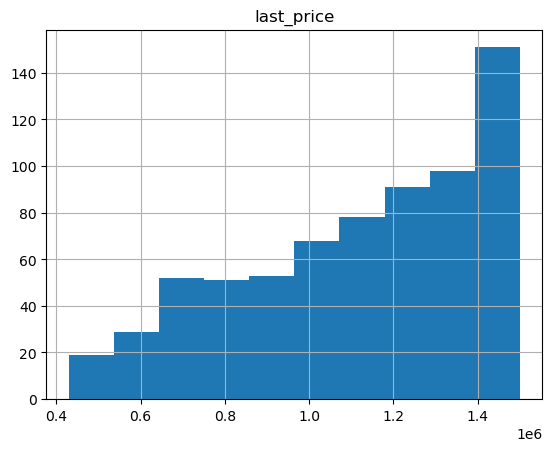

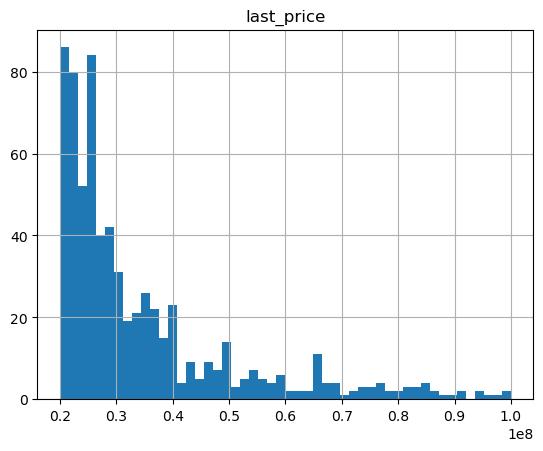

In [92]:
# гистограмма от min и до max значений
# гистограмма от min и до 1.5 млн значений
# гистограмма от 20 млн и до max значений

df[['last_price']].hist(bins=100, range=(430000,330000000))
plt.show() 
df[['last_price']].hist(bins=10, range=(430000,1500000))
plt.show() 
df[['last_price']].hist(bins=50, range=(20000000,100000000))
plt.show() 

array([[<Axes: title={'center': 'last_price'}>]], dtype=object)

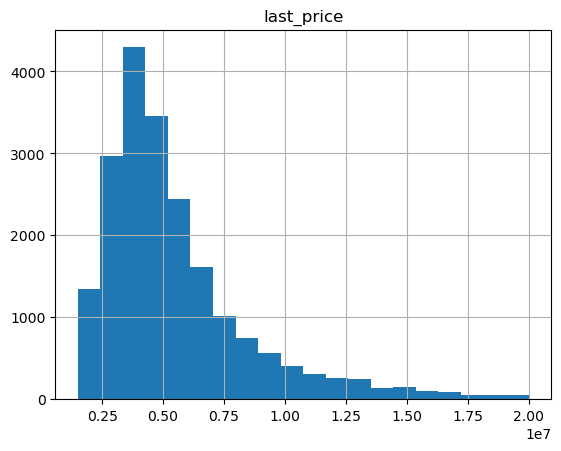

In [93]:
df_new = df_new[(df_new['last_price'] >= 1500000) & (df_new['last_price'] <= 20000000)]
df_new[['last_price']].hist(bins=20, range=(1500000,20000000))

Цена объекта - вывод

Выбросы, что соответствуют очень высокой стоимости которые могут принадлежать объектам не стандартного предложения, отброшены.

Похоже на распределение Пуассона и рациональный выбор. где стоимость от 1,5 млн до 20 млн в общей площади квартир от 20 до 200 м.кв

### Количество комнат `rooms`

         rooms
count 20263.00
mean      2.00
std       0.94
min       0.00
25%       1.00
50%       2.00
75%       3.00
max       5.00


<Axes: >

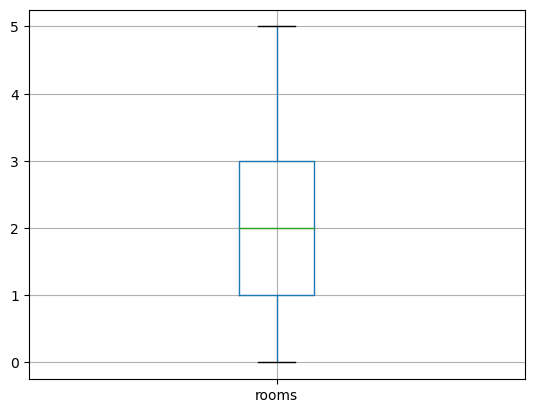

In [94]:
print(df_new[['rooms']].describe())
df_new.boxplot('rooms')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_meter,day_week_pbl,month_pbl,year_pbl,floor_type,city_centers_nearest_km
5255,15,6100000.00,87.00,2017-06-28,6,3.50,3.00,68.00,2,False,...,534.00,3.00,676.00,NaN,70114.94,2,6,2017,другой,34.00
14510,3,6864000.00,95.00,2018-10-12,6,2.50,15.00,75.00,3,False,...,NaN,2.00,575.00,12.00,72252.63,4,10,2018,другой,11.00
3314,20,16550000.00,96.00,2018-02-16,6,2.60,5.00,80.00,3,False,...,546.00,3.00,183.00,108.00,172395.83,4,2,2018,другой,1.00
14603,12,13490000.00,100.60,2018-07-31,7,2.50,4.00,NaN,2,True,...,574.00,3.00,325.00,50.00,134095.43,1,7,2018,другой,4.00
20256,5,13351000.00,102.70,2018-07-03,6,3.40,4.00,101.00,1,False,...,519.00,0.00,NaN,229.00,130000.00,1,7,2018,первый,5.00
14649,11,12990000.00,106.00,2018-07-08,6,2.50,4.00,NaN,1,False,...,NaN,1.00,361.00,90.00,122547.17,6,7,2018,первый,4.00
9856,13,12000000.00,106.00,2018-07-30,6,2.80,3.00,70.00,1,False,...,NaN,1.00,238.00,NaN,113207.55,0,7,2018,первый,5.00
23047,11,10500000.00,110.00,2018-06-30,6,3.20,7.00,75.00,6,False,...,NaN,0.00,NaN,NaN,95454.55,5,6,2018,другой,4.00
2017,1,9100000.00,111.00,2017-07-04,6,2.75,3.00,84.50,3,False,...,588.00,1.00,54.00,61.00,81981.98,1,7,2017,последний,2.00
18548,19,11700000.00,119.00,2018-08-27,6,3.00,10.00,86.20,3,False,...,86.00,1.00,590.00,204.00,98319.33,0,8,2018,другой,10.00


<Axes: xlabel='rooms', ylabel='total_area'>

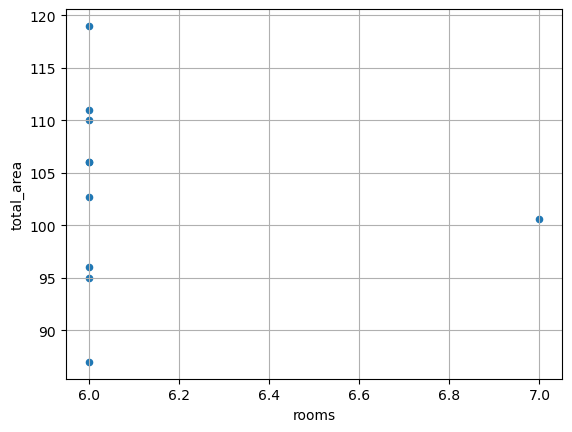

In [95]:
max_rooms = df.query('6 <= rooms <= 8').sort_values(by='total_area', ascending=True).head(10)
display(max_rooms)
max_rooms.plot(
    x='rooms', 
    y='total_area', 
    kind='scatter', 
    grid=True
)

Возможных опечаток количества комнат не наблюдается, площади соответствуют количеству комнат

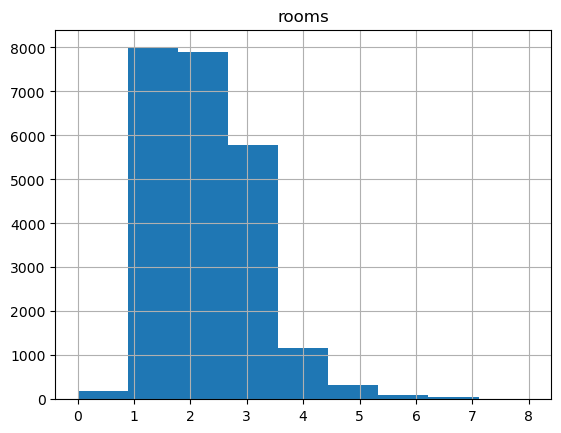

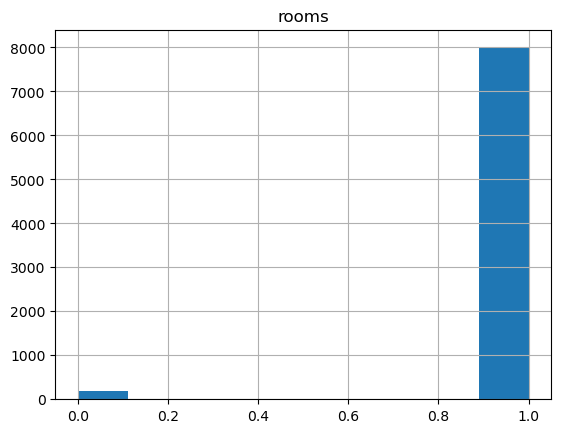

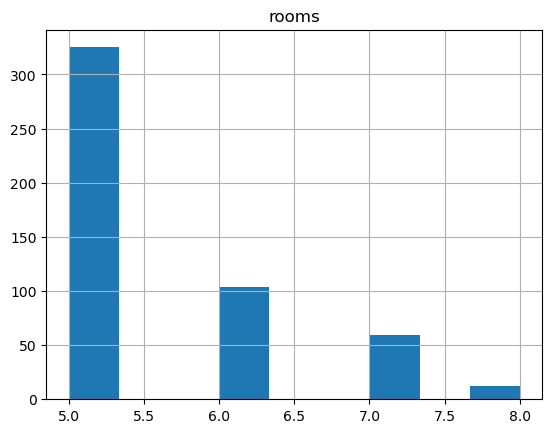

In [96]:
df[['rooms']].hist(bins=9, range=(0,8))
plt.show() 
df[['rooms']].hist(bins=9, range=(0,1))
plt.show() 
df[['rooms']].hist(bins=9, range=(5,8))
plt.show() 

array([[<Axes: title={'center': 'rooms'}>]], dtype=object)

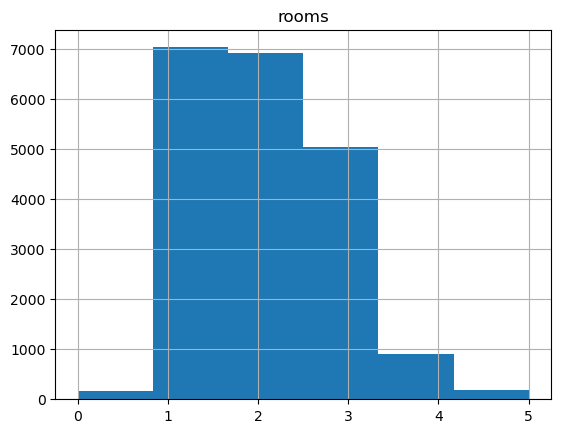

In [97]:
df_new = df_new[df_new['rooms'] <= 5]
df_new[['rooms']].hist(bins=6, range=(0,5))

Количество комнат - вывод, 

0 - это студии,стоит выделить их в отдельную категорию как набирающую обороты в тенденции к уменьшению площади жилья. Можно предложить сделать отдельную проверку указания количества комнат на площадь помещений

Отброшена часть данных с количеством комнат более 5, так как их составляющая не привышает 200 размещений

<Axes: xlabel='rooms', ylabel='total_area'>

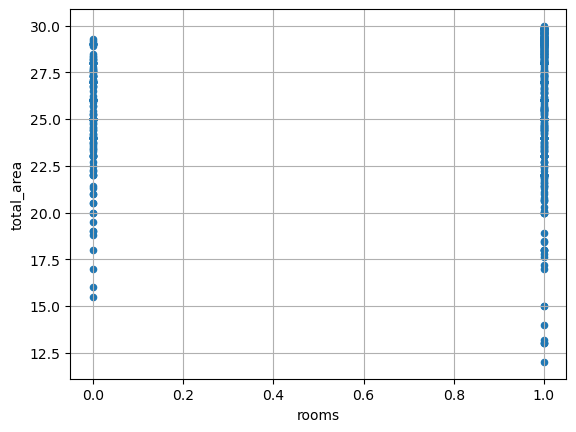

In [98]:
studios = df.query('rooms < 2 and total_area < 30 ').sort_values(by='total_area', ascending=True)

studios.plot(
    x='rooms', 
    y='total_area', 
    kind='scatter', 
    grid=True
)

In [99]:
len(studios.loc[studios['rooms'] == 1])

516

Видно что 516 квартир обозначены как 1 комнатные и имеют площадь менее 30 м.кв. с вероятностью 90% это квартиры студии. 

### Высота потолков `ceiling_height`

       ceiling_height
count        20263.00
mean             2.63
std              0.25
min              1.00
25%              2.50
50%              2.50
75%              2.70
max             10.30


<Axes: >

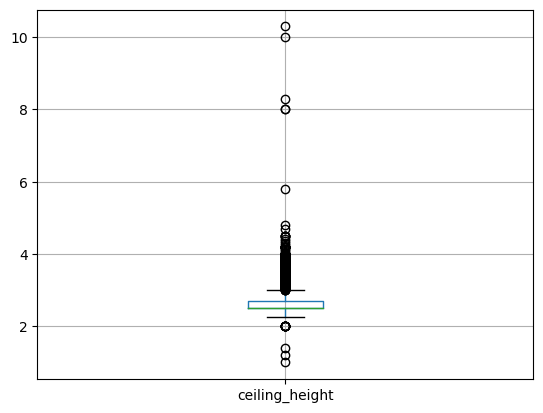

In [100]:
print(df_new[['ceiling_height']].describe())
df_new.boxplot('ceiling_height')

In [101]:
df.query('4 <= ceiling_height <= 100').sort_values(by='total_area', ascending=True) #выведу список выбросов более 4 м высота потолков

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_meter,day_week_pbl,month_pbl,year_pbl,floor_type,city_centers_nearest_km
22869,0,15000000.00,25.00,2018-07-25,1,100.00,5.00,14.00,5,True,...,223.00,3.00,30.00,19.00,600000.00,2,7,2018,последний,8.00
4876,7,3000000.00,25.00,2017-09-27,0,27.00,25.00,17.00,17,False,...,NaN,NaN,NaN,28.00,120000.00,2,9,2017,другой,NaN
1053,13,550000.00,29.00,2018-02-01,1,5.00,3.00,NaN,1,False,...,NaN,NaN,NaN,6.00,18965.52,3,2,2018,первый,NaN
3474,3,1400000.00,30.00,2018-03-16,1,8.00,5.00,15.30,2,False,...,NaN,NaN,NaN,125.00,46666.67,4,3,2018,другой,NaN
5076,0,3850000.00,30.50,2018-10-03,1,24.00,5.00,19.50,1,True,...,397.00,1.00,578.00,7.00,126229.51,2,10,2018,первый,8.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1085,16,75000000.00,323.00,2017-07-10,5,4.00,5.00,255.70,4,False,...,398.00,2.00,515.00,259.00,232198.14,0,7,2017,другой,1.00
1388,20,59800000.00,399.00,2015-01-21,5,5.60,6.00,NaN,6,False,...,149.00,2.00,577.00,719.00,149874.69,2,1,2015,последний,7.00
22494,7,91075000.00,491.00,2017-05-27,5,4.20,9.00,274.00,9,False,...,116.00,0.00,NaN,115.00,185488.80,5,5,2017,последний,6.00
12401,20,91500000.00,495.00,2017-06-19,7,4.65,7.00,347.50,7,False,...,110.00,0.00,NaN,14.00,184848.48,0,6,2017,последний,6.00


Срез недвижимости с высотой потолков выше 4 метров показал что всего таких обьявлений 113 из ниесть аномалии в 100м и скорее всего это не имеющее к реальности значение и есть значения с пропущеной точкой. исправим их. 

#переменная с возможной опечаткой высоты с пропущеной точкой
incorrect_height = df_new[(df_new['ceiling_height'] >= 12) & (df_new['ceiling_height'] < 100)]
#перенос знака из целого числа дробное реальное по отношению к высоте потолков
incorrect_height_cor = incorrect_height['ceiling_height'] /10
#перевел в набор значений ошибочные числа
incorrect_height = incorrect_height['ceiling_height'].tolist()
#перевел в набор значений скорректированные
incorrect_height_cor = incorrect_height_cor.tolist()

#замена значений
df_new['ceiling_height'] = df_new['ceiling_height'].replace(incorrect_height, incorrect_height_cor)
#какие значения остались более 5 метров
display(df_new.query('5 <= ceiling_height <= 100').sort_values(by='total_area', ascending=True))
#проверка замены 27м на 2,7 по строке 4876
df_new.loc[[4876]]

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера V1<a class="tocSkip"></h2>


<b>На доработку🤔:</b>
Слишком костыльный метод. Используй метод loc, с его помощью значения больше/меньше какой-то границы можно разделить на 10 в исходном датафрейме.

In [102]:
#замена значений
df_new.loc[(df_new['ceiling_height'] >= 12) & (df_new['ceiling_height'] <= 100), 'ceiling_height'] /= 10
#какие значения остались более 5 метров
display(df_new.query('5 <= ceiling_height <= 100').sort_values(by='total_area', ascending=True))
#проверка замены 27м на 2,7 по строке 4876
df_new.loc[[4876]]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_meter,day_week_pbl,month_pbl,year_pbl,floor_type,city_centers_nearest_km
22869,0,15000000.00,25.00,2018-07-25,1,10.00,5.00,14.00,5,True,...,223.00,3.00,30.00,19.00,600000.00,2,7,2018,последний,8.00
5863,20,5650000.00,45.00,2018-08-15,1,8.30,16.00,19.30,14,False,...,NaN,1.00,613.00,14.00,125555.56,2,8,2018,другой,11.00
22309,20,5300000.00,45.00,2017-09-30,1,10.30,16.00,15.50,15,False,...,440.00,2.00,450.00,136.00,117777.78,5,9,2017,другой,12.00
17442,0,5350000.00,54.00,2015-06-16,2,8.00,5.00,29.00,2,False,...,NaN,0.00,NaN,469.00,99074.07,1,6,2015,другой,28.00
15743,14,5600000.00,67.00,2016-11-11,3,8.00,16.00,41.00,1,False,...,723.00,0.00,NaN,474.00,83582.09,4,11,2016,первый,11.00
21227,0,8200000.00,71.00,2017-07-21,0,5.80,5.00,68.00,5,False,...,295.00,3.00,366.00,30.00,115492.96,4,7,2017,последний,1.00


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_meter,day_week_pbl,month_pbl,year_pbl,floor_type,city_centers_nearest_km
4876,7,3000000.00,25.00,2017-09-27,0,2.70,25.00,17.00,17,False,...,NaN,NaN,NaN,28.00,120000.00,2,9,2017,другой,NaN


<div class="alert alert-info"> <b>Комментарий студента:</b>

ух ты, да ...и всего 5 минут на код, а сколько времени на раздумье было убито тогда, лучше бы поспал </div>

<div class="alert alert-success">
<h2> Комментарий ревьюера V2<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Все правильно доработал, так держать!

Опечатка с пропущенной запятой исправлена значения высоты птолков 8,10,100 аномалии и составляют 5 строк, две строки с высотой 5,3 метра могут быть реальностью на последнем этаже в пенхаусе.

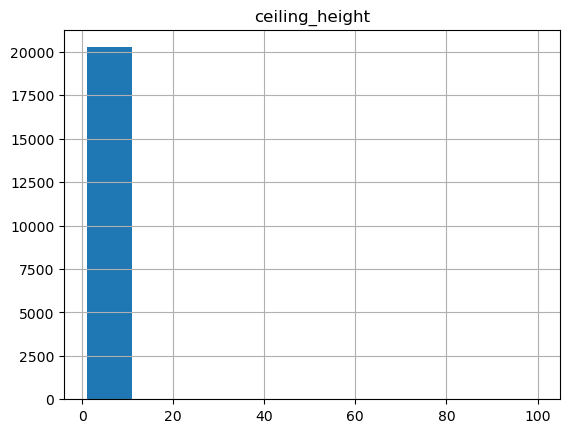

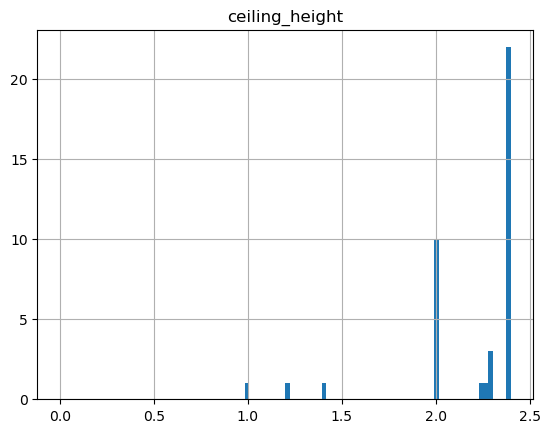

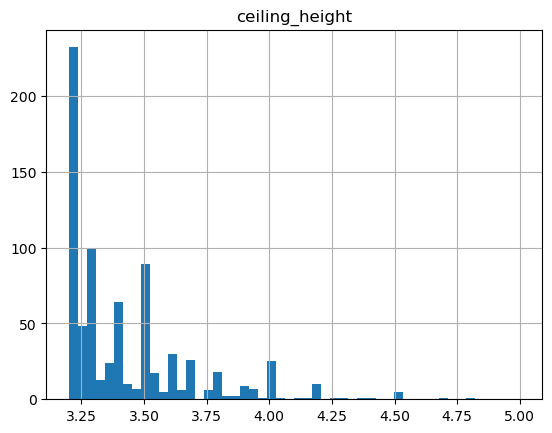

In [103]:
#взгляд сверху
df_new[['ceiling_height']].hist(bins=10, range=(1,100))
plt.show() 
df_new[['ceiling_height']].hist(bins=100, range=(0,2.4))
plt.show() 
df_new[['ceiling_height']].hist(bins=50, range=(3.2,5))
plt.show() 

array([[<Axes: title={'center': 'ceiling_height'}>]], dtype=object)

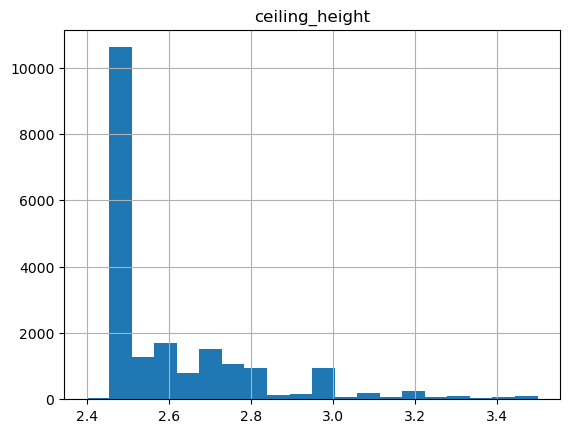

In [104]:
df_new = df_new[(df_new['ceiling_height'] >= 2.4) & (df_new['ceiling_height'] <= 3.5)]
df_new[['ceiling_height']].hist(bins=20, range=(2.4,3.5))

Высота потолков - вывод

Оставляю в выборке данные с 2.4 метра(высота реальная после установки натяжных потолков) до 3.5 метров включительно которые реально могут отображать предложение рынка.

### Тип этажа квартиры («первый», «последний», «другой») `floor_type`

In [105]:
print(df_new['floor_type'].value_counts())

floor_type
другой       14973
последний     2682
первый        2403
Name: count, dtype: int64


In [106]:
df['floor_type'].isna().sum()

0

Тип этажа квартиры («первый», «последний», «другой») - вывод

Аномалий и выбросов в параметре этажа нет. 

### Общее количество этажей в доме `floors_total`

       floors_total
count      20058.00
mean          10.96
std            6.57
min            1.00
25%            5.00
50%            9.00
75%           16.00
max           35.00


<Axes: >

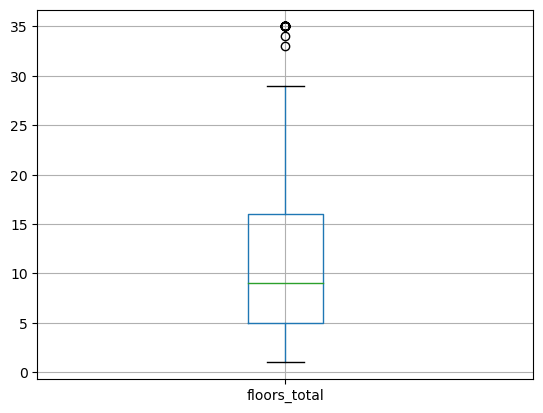

In [107]:
print(df_new[['floors_total']].describe())
df_new.boxplot('floors_total')

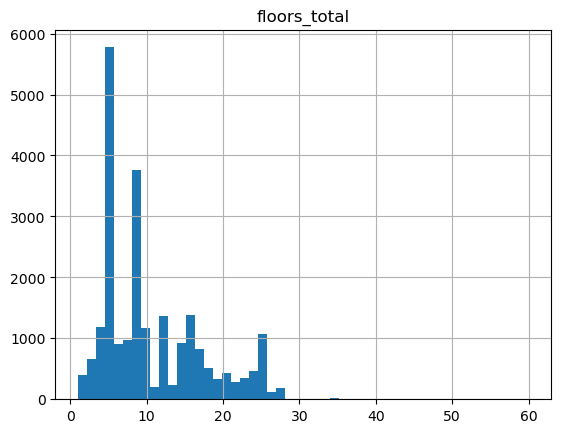

In [108]:
df[['floors_total']].hist(bins=50, range=(1,60))
plt.show() 

In [109]:
df.query('35 < floors_total <= 60').sort_values(by='floors_total', ascending=True)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_meter,day_week_pbl,month_pbl,year_pbl,floor_type,city_centers_nearest_km
397,15,5990000.00,54.00,2018-03-22,2,2.50,36.00,21.40,28,False,...,NaN,3.00,80.00,11.00,110925.93,3,3,2018,другой,20.00
5807,17,8150000.00,80.00,2019-01-09,2,27.00,36.00,41.00,13,False,...,NaN,3.00,80.00,38.00,101875.00,2,1,2019,другой,20.00
11079,16,9200000.00,75.00,2019-02-22,2,2.70,36.00,40.00,29,False,...,NaN,3.00,80.00,NaN,122666.67,4,2,2019,другой,20.00
16934,5,4100000.00,40.00,2017-10-17,1,1.75,37.00,17.40,5,False,...,NaN,3.00,80.00,71.00,102500.00,1,10,2017,другой,20.00
16731,9,3978000.00,40.00,2018-09-24,1,2.65,52.00,10.50,18,False,...,793.00,0.00,NaN,45.00,99450.00,0,9,2018,другой,13.00
2253,12,3800000.00,45.50,2018-06-28,2,2.88,60.00,27.40,4,False,...,342.00,3.00,614.00,166.00,83516.48,3,6,2018,другой,49.00


array([[<Axes: title={'center': 'floors_total'}>]], dtype=object)

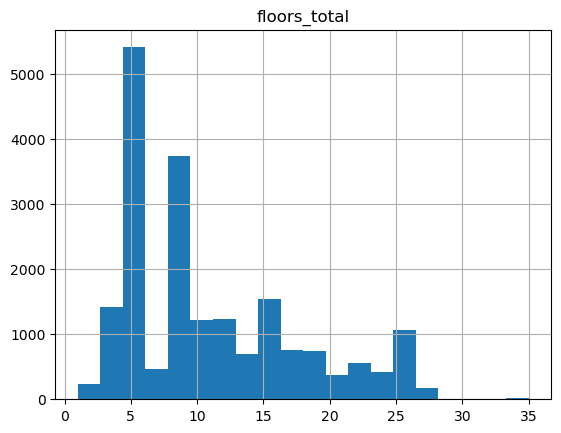

In [110]:
#ОТСЕЯНЫ предложения в домах более 35 этажей так как таких высоких зданий нет
#самая большая этажность в ЖК "Князь Александр Невский"
df_new = df_new[df_new['floors_total'] < 36]
df_new[['floors_total']].hist(bins=20, range=(1,35))

Общее количество этажей в доме - вывод

6 аномальных предложений не попадут в общую выборку так как зданий с жилым фондом в СПБ выше 35 этажей нет.

### Расстояние до центра города в метрах `city_centers_nearest`

       city_centers_nearest
count              15778.00
mean               14658.86
std                 8543.97
min                  287.00
25%                10178.25
50%                13354.00
75%                16464.75
max                65968.00


<Axes: >

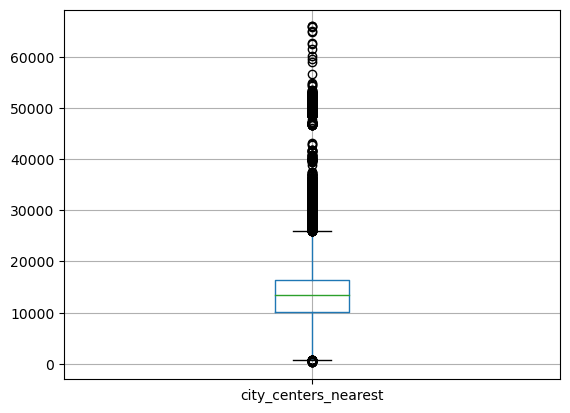

In [111]:
print(df_new[['city_centers_nearest']].describe())
df_new.boxplot('city_centers_nearest')

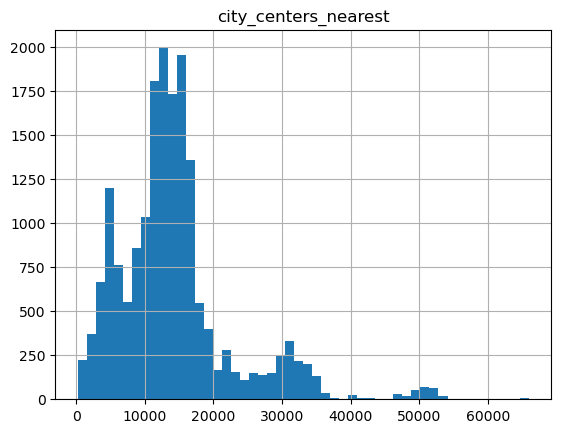

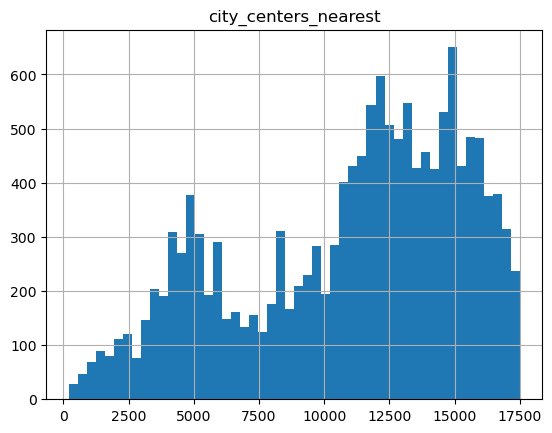

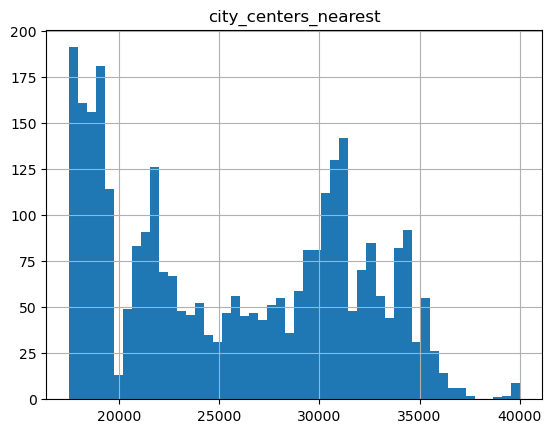

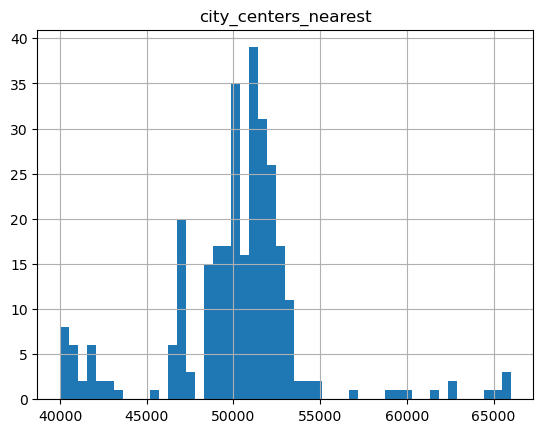

In [112]:
#взгляд сверху на реальность картины где разобьем СПБ до кольцевой дороги, пригород и область.


df[['city_centers_nearest']].hist(bins=50, range=(208,65968))
plt.show() 
df[['city_centers_nearest']].hist(bins=50, range=(208,17500)) #кольцевая автодорога
plt.show() 
df[['city_centers_nearest']].hist(bins=50, range=(17500,40000)) #пригород
plt.show() 
df[['city_centers_nearest']].hist(bins=50, range=(40000,66000)) #Ленинградская область
plt.show() 

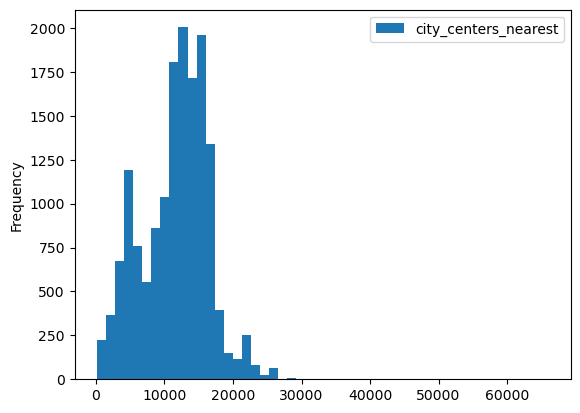

<Axes: ylabel='Frequency'>

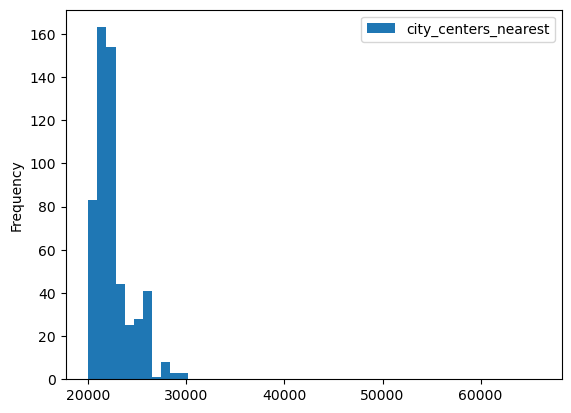

In [113]:
#общее распределение обьявлений с указанием населенного пункта СПБ по растоянию от центра
(
    df.query('locality_name == "Санкт-Петербург"')\
    .plot(kind='hist', y='city_centers_nearest', bins=50, range=(208,66000))
)
plt.show() 

#Аномальное растояние от центра с указание населенного пункта СПБ, границы примерно до КАД
(
    df.query('locality_name == "Санкт-Петербург"')\
    .plot(kind='hist', y='city_centers_nearest', bins=50, range=(20000,66000))
)

Расстояние до центра города в метрах - вывод 

отдельное иследование при группировке растояния внутри города СПБ и по отдаленности пригород и Ленинградская область провести можно на предмет мошеннической деятельности, сейчас на растоянии от 20 км дл 30км где существуют иные административные центры в объявлениях указан `Санкт-Петербург`. Глобализация и рост мегаполисов, хотябы геосервис покажет верную отдаленность для покупателя.

### Расстояние до ближайшего парка - `parks_nearest` 

Количество пропусков = 15620, очень большое и заполнить их без геосервиса будет не рационально.

       parks_nearest
count        6763.00
mean          493.00
std           339.33
min             1.00
25%           290.00
50%           456.00
75%           614.00
max          3190.00


<Axes: >

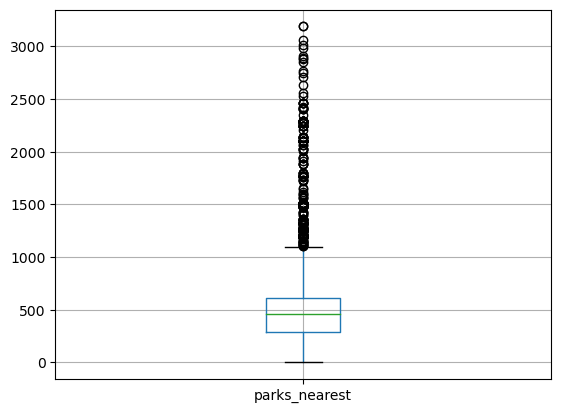

In [114]:
print(df_new[['parks_nearest']].describe())
df_new.boxplot('parks_nearest')

In [115]:
print(len(df.query('locality_name == "Санкт-Петербург"')))

15651


По столбцу `parks_around3000` мы видим меньше пропусков в данных, но так как разброс от 1 до 3190 метров заполнить пропуски по столбцу `parks_nearest` средним, медианным либо максимальным логическим 3000 м (факт наличия парка в этом диапазоне подтверждается) будет не верным и искажать иследование.

Данные есть только для половины обьявлений

7251


<Axes: ylabel='Frequency'>

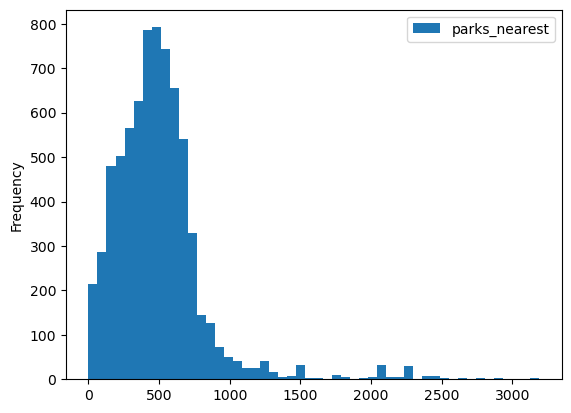

In [116]:
print(len(df.query('locality_name == "Санкт-Петербург" and parks_nearest >= 1')))
(
    df.query('locality_name == "Санкт-Петербург"')\
    .plot(kind='hist', y='parks_nearest', bins=50, range=(1,3190))
)

Расстояние до ближайшего парка - вывод

Анализ данных можно произвести только по имеющим данным, но из общей выборки это 33% надежность результата под сомнением.

Так например у нас очень много данных с шаговой доступностью до 500 м, так же до 1000м для долгих прогулок и пробежек и совсем мало данных свыше 1000м. а если добавить еще столько же обьявлени по г.Санкт-Петербург вывод может поменятся.

In [183]:
print(len(df_new))
df_new.describe()

20058


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_meter,day_week_pbl,month_pbl,year_pbl,city_centers_nearest_km
count,20058.00,20058.00,20058.00,20058,20058.00,20058.00,20058.00,20058.00,20058.00,20058.00,...,15779.00,6763.00,15779.00,7623.00,17474.00,20058.00,20058.00,20058.00,20058.00,15778.00
mean,9.98,5447069.68,56.15,2017-11-06 10:55:10.320071680,2.00,2.62,10.96,32.12,6.00,9.96,...,0.58,493.00,0.73,527.58,180.78,96640.55,2.55,6.43,2017.36,14.65
min,0.00,1500000.00,20.00,2014-11-27 00:00:00,0.00,2.40,1.00,9.00,1.00,5.00,...,0.00,1.00,0.00,13.00,1.00,14347.83,0.00,1.00,2014.00,0.00
25%,6.00,3500000.00,40.00,2017-05-05 00:00:00,1.00,2.50,5.00,18.50,2.00,7.00,...,0.00,290.00,0.00,309.00,43.00,78254.24,1.00,3.00,2017.00,10.00
50%,10.00,4600000.00,51.00,2017-12-02 00:00:00,2.00,2.50,9.00,30.00,4.00,9.00,...,0.00,456.00,0.00,514.00,98.00,95000.00,2.00,6.00,2017.00,13.00
75%,14.00,6499000.00,67.00,2018-08-31 00:00:00,3.00,2.70,16.00,41.10,8.00,11.30,...,1.00,614.00,1.00,737.00,232.00,112427.94,4.00,10.00,2018.00,16.00
max,50.00,20000000.00,200.00,2019-05-03 00:00:00,5.00,3.50,35.00,120.00,33.00,40.00,...,3.00,3190.00,3.00,1344.00,1580.00,355555.56,6.00,12.00,2019.00,66.00
std,5.62,2998109.71,22.35,NaN,0.94,0.19,6.57,15.16,4.91,4.19,...,0.77,339.33,0.91,276.56,217.38,30041.63,1.78,3.47,1.04,8.55


После всех срезов осталось данных 20058 строки из 23565. отбросили 8% данных они не повлияют на следующее иследование.
Так были убраны объекты с слишком маленькой площадью, низкими потолками. Элитная недвижимомть или уже комерческая недвижимость которая должна оцениватся и анализироватся отдельно. Выбросы и не обоснованные данные этажа и высоты потолков, опечатки поправлены.

Требуется наблюдение и проверка обьявлений с растоянием до центра, т.к. могут быть указаны неверные населенные пункты, которые будут вводить в заблуждение покупателей.


<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> По анализу все хорошо, достатчоно подробно рассмотрел гистограммы, вывел отдельные части для более точного распределения. Молодец, что вывел и проанализировал также статистики. Только стоит поправить вывод датафреймов в display().

## Как же быстро продавались квартиры `days_exposition`

       days_exposition
count         17474.00
mean            180.78
std             217.38
min               1.00
25%              43.00
50%              98.00
75%             232.00
max            1580.00


<Axes: >

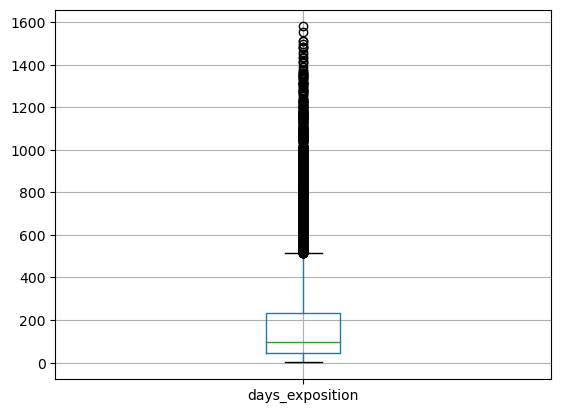

In [118]:
print(df_new[['days_exposition']].describe())
df_new.boxplot('days_exposition')

array([[<Axes: title={'center': 'days_exposition'}>]], dtype=object)

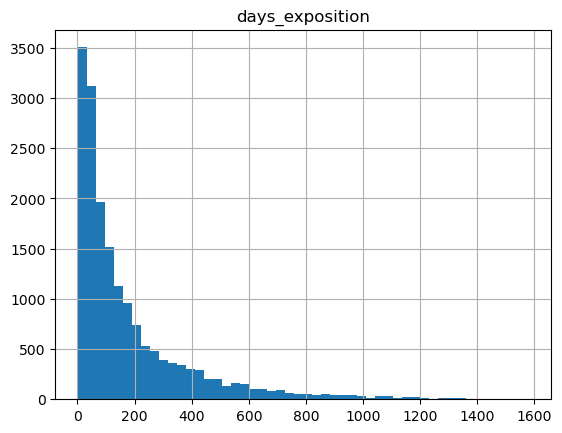

In [119]:
df_new[['days_exposition']].hist(bins=50, range=(1,1580))

Один из распространенных способов найти слишком быстрые и слишком длительные продажи это воспользоватся межквартильный диапозон

IQR

Выброс, если его значение в 1,5 раза больше, чем IQR, или в 1,5 раза меньше, чем IQR.

In [120]:
#найдем нижний и верхний пределы
lower_limit = 44-1.5*(225-44)
print('Аномалии если ниже:', lower_limit)

upper_limit = 225+1.5*(225-44)
print('Аномалии если выше:', upper_limit)

Аномалии если ниже: -227.5
Аномалии если выше: 496.5


array([[<Axes: title={'center': 'days_exposition'}>]], dtype=object)

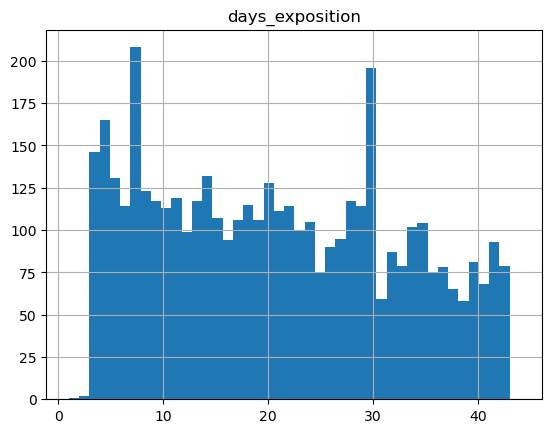

In [121]:
#посморим на Q1 сверху
df_new[['days_exposition']].hist(bins=44, range=(1,44))

array([[<Axes: title={'center': 'days_exposition'}>]], dtype=object)

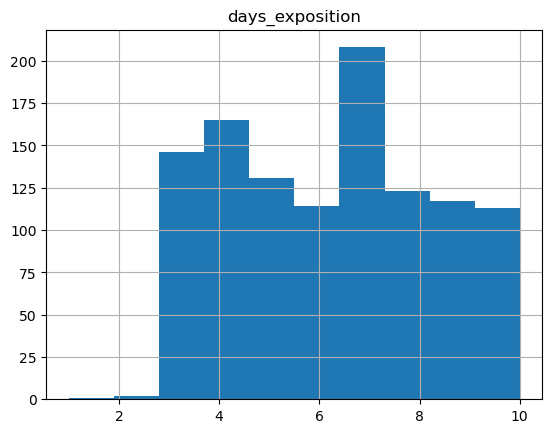

In [122]:
#подробнее в диапозоне 1-10
df_new[['days_exposition']].hist(bins=10, range=(1,10))

array([[<Axes: title={'center': 'days_exposition'}>]], dtype=object)

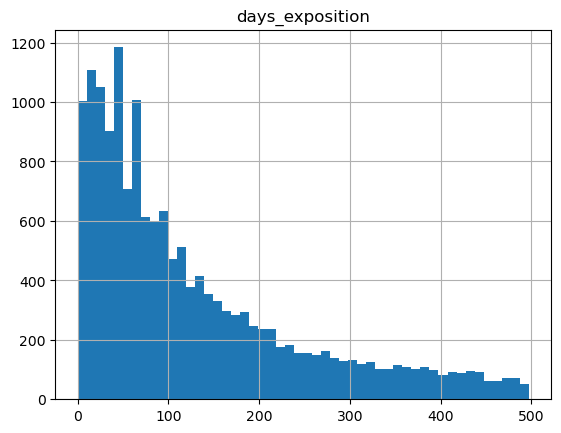

In [123]:
period_sale = df_new[(df_new['days_exposition'] > 2) & (df_new['days_exposition'] < 497)]

period_sale[['days_exposition']].hist(bins=50, range=(0,497))

In [124]:
print('Медиана срока продаж:', period_sale['days_exposition'].median())
print()
print('Средняя срока продаж:', period_sale['days_exposition'].mean())

Медиана срока продаж: 87.00000000000001

Средняя срока продаж: 127.6733007885843


Обычно продажа занимает от 82 до 125 дней, что соответствует периодом от медианы до средней арифмитической, под влиянием большого количества факторов.

Слишком быстрыми продажами можно считать из расчетного метода где -228 дней, что нереально, по гистограмме видны данные что продажи в 1 и 2 дня крайне редки относительно основного массива, поэтому будем считать эти продажи быстрыми.

Необычно долгие продажи получим из расчетного метода более 497 дней.


<div class="alert alert-warning">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Некоторые замечания и рекомендации💡:</b> В качестве быстрых продаж можно было ориентироваться на какой-нибудь квантиль, чтобы понимать долю таких объявлений. Например, значение первого квартиля 44 дня, то есть у нас уже четверть объявлений продается до 44 дней, можно сильнее уменьшить долю быстрых продаж, например 10-15% выборки. 
    
В целом все правлиьно рассмотрел, молодец, что отдельно посмотрел на выбросы, только не хватает комментариев какие сроки продаж выбиваются из выборки, предположить с чем это может быть связано.

<div class="alert alert-info"> <b>Комментарий студента:</b>

))хорошо в коде значит взять 1 кватнить и отнего 15% и это и былибы быстрые продажи, звучит просто. этого достаточно?


Да важный вопрос с чем связаны долгие продажи и вопрос из бизнеса, оборачиваемость важна, не стал углублятся в влияние цены или отдаленности, подумал что ето уже совсем "новая история".

</div>

<div class="alert alert-warning">
<h2> Комментарий ревьюера V2<a class="tocSkip"> </h2>

<b>Некоторые замечания и рекомендации💡:</b> В разных задачах могут быть свои критерии определения быстрых продаж, например, в распределении может быть несколько пиков. В данной задаче лучше на квантили ориентироваться, чтобы понимать долю таких объявлений. Поэтому твой вариант подходит.

## Графики, которые показывают зависимость цены от параметров:



- [ ] общая площадь;
- [ ] жилая площадь;
- [ ] площадь кухни;
- [ ] количество комнат;
- [ ] тип этажа, на котором расположена квартира (первый, последний, другой);
- [ ] дата размещения (день недели, месяц, год).

### Влияние `total_area` на `last_price`

Коэффициент Пирсона: 0.7707546791301708


<Axes: xlabel='total_area', ylabel='last_price'>

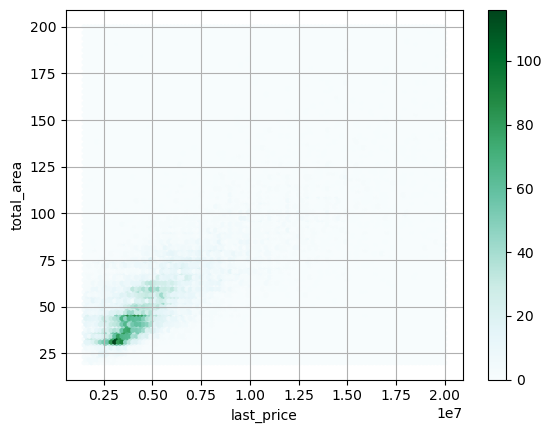

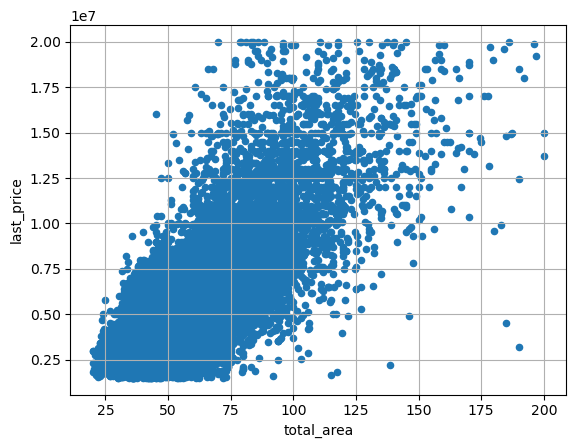

In [125]:
print('Коэффициент Пирсона:',df_new['last_price'].corr(df_new['total_area']))
df_new.plot(x='last_price', y='total_area', kind='hexbin', grid=True)
df_new.plot(x='total_area', y='last_price', kind='scatter', grid=True)

<Axes: xlabel='total_area'>

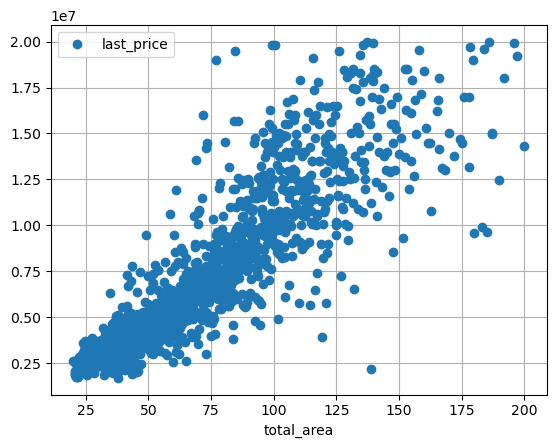

In [126]:
(
    df_new
    .pivot_table(
        index='total_area', 
        values = 'last_price', 
        aggfunc = 'median')
    .plot(
        style='o', 
        grid=True)
)

Коэфициент пирсона и после группировки данных наглядно выдно кореляцию и прямое влияние на стоимость за счет площади. Оно и понятно)

### Влияние `living_area` на `last_price`

Коэффициент Пирсона: 0.6542705633597836


<Axes: xlabel='living_area', ylabel='last_price'>

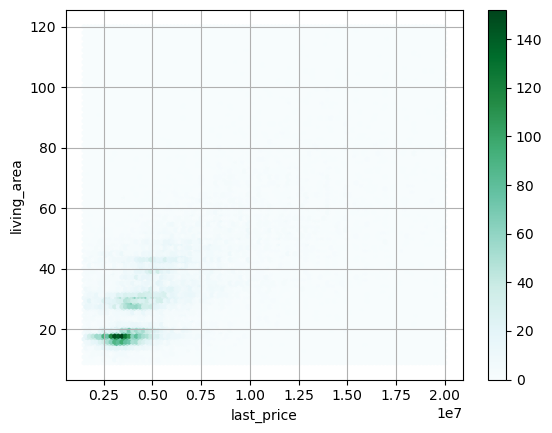

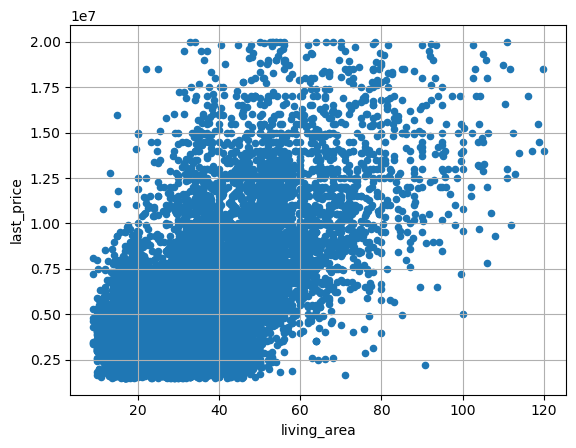

In [127]:
print('Коэффициент Пирсона:',df_new['last_price'].corr(df_new['living_area']))
df_new.plot(x='last_price', y='living_area', kind='hexbin', grid=True)
df_new.plot(x='living_area', y='last_price', kind='scatter', grid=True)

<Axes: xlabel='living_area'>

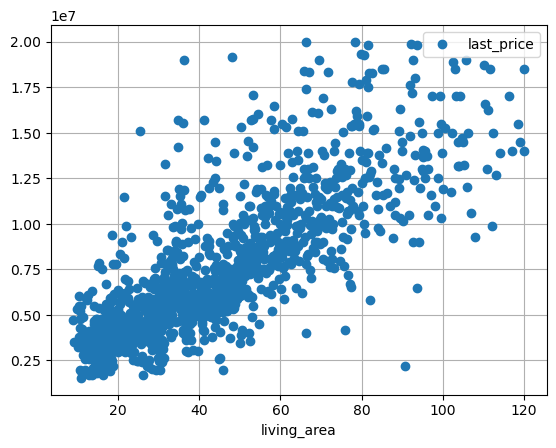

In [128]:
(
    df_new
    .pivot_table(
        index='living_area', 
        values = 'last_price', 
        aggfunc = 'median')
    .plot(
        style='o', 
        grid=True)
)

Коэфициент пирсона и именно после группировки данных наглядно видно кореляцию и прямое влияние на стоимость за счет жилой площади.

<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Выше зависимость от общей площади и жилой площади рассмотрел и описал верно.

### Влияние `kitchen_area` на `last_price`

Коэффициент Пирсона: 0.5597148496525529


<Axes: xlabel='kitchen_area', ylabel='last_price'>

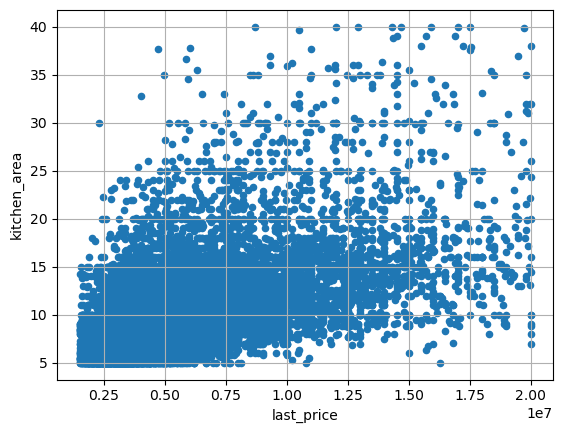

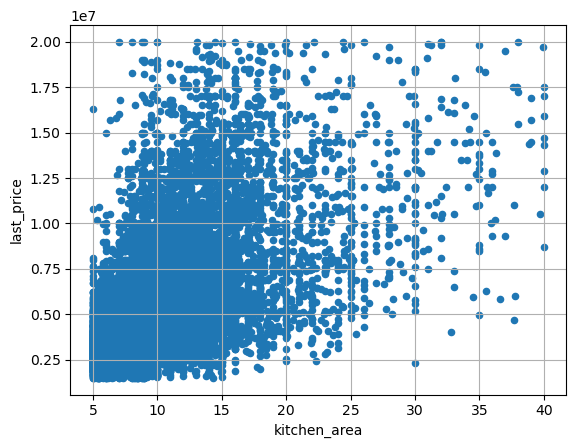

In [129]:
print('Коэффициент Пирсона:',df_new['last_price'].corr(df_new['kitchen_area']))
df_new.plot(x='last_price', y='kitchen_area', kind='scatter', grid=True)
df_new.plot(x='kitchen_area', y='last_price', kind='scatter', grid=True)

<Axes: xlabel='kitchen_area'>

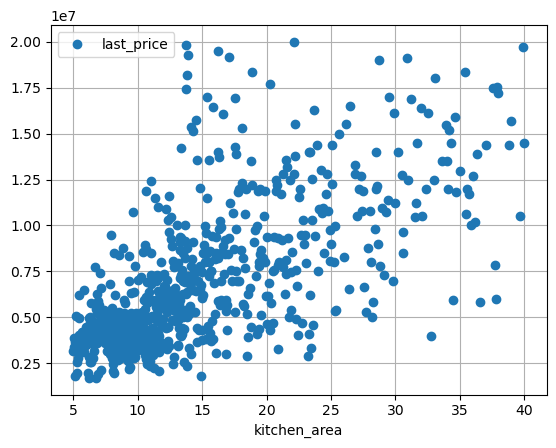

In [130]:
(
    df_new
    .pivot_table(
        index='kitchen_area', 
        values = 'last_price', 
        aggfunc = 'median')
    .plot(
        style='o', 
        grid=True)
)

Кореляция слабая но положительная и на стоимость влияет слабо полощадь кухни.

In [131]:
#проверю кореляцию на маленьких площадях кухни
small_kitchen_area = df_new.query('kitchen_area <20')
small_kitchen_area['last_price'].corr(small_kitchen_area['kitchen_area'])

0.5178633602514129

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера V1<a class="tocSkip"></h2>


<b>На доработку🤔:</b>
Выше ты смотришь наоборот большие кухни.

<div class="alert alert-info"> <b>Комментарий студента:</b>

🤔да..... исправил  </div>

<div class="alert alert-success">
<h2> Комментарий ревьюера V2<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Отлично!

Кореляция не сильноизменилась, тем более площадь кухни влияет не сильно на стоимость обьекта только при её весомом увеличении.
В основной массе "ядре" иследования слабое отношение этих двух характеристик

### Влияние `rooms` на `last_price`

Коэффициент Пирсона: 0.49524598508946055


<Axes: xlabel='last_price', ylabel='rooms'>

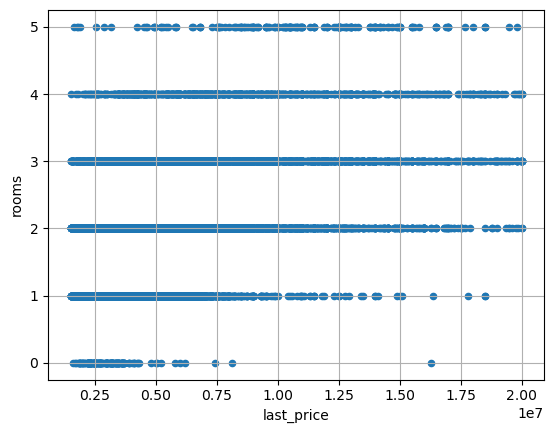

In [132]:
print('Коэффициент Пирсона:',df_new['last_price'].corr(df_new['rooms']))
df_new.plot(x='last_price', y='rooms', kind='scatter', grid=True)

<Axes: xlabel='rooms'>

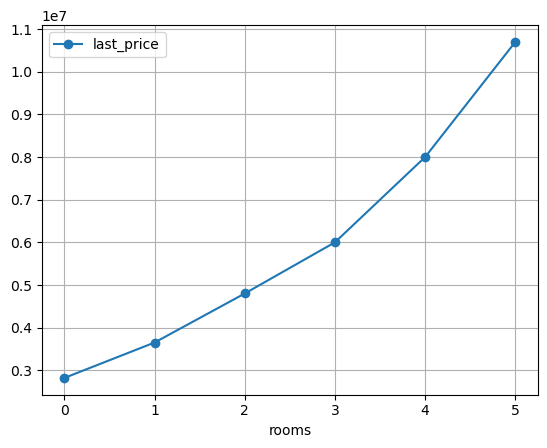

In [138]:
(
    df_new
    .pivot_table(
        index='rooms', 
        values = 'last_price', 
        aggfunc = 'median')
    .plot(
        style='o-', 
        grid=True)
)

<Axes: xlabel='rooms'>

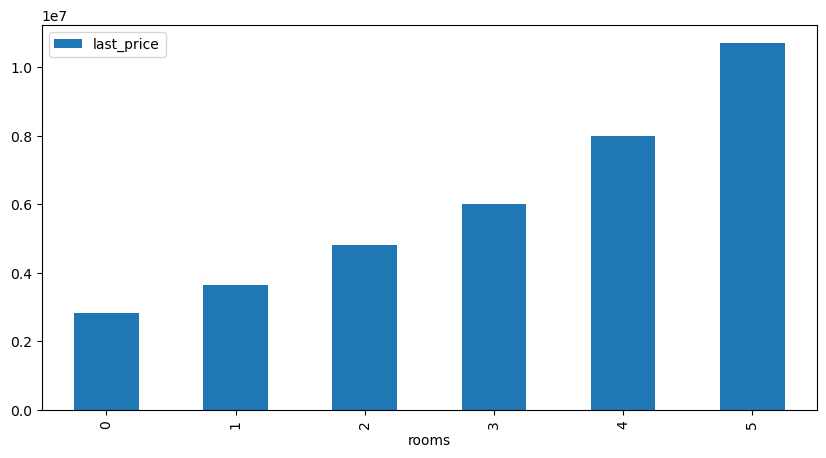

In [134]:
(
    df_new
    .pivot_table(
        index='rooms', 
        values = 'last_price', 
        aggfunc = 'median')
    .plot(
        y='last_price',
        kind='bar',
        figsize=(10,5))
)

<div class="alert alert-warning">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Некоторые замечания и рекомендации💡:</b> Здесь можно было соединить точки линией, то есть построить линейную диаграмму или столбчатую, так будет проще визуально видеть изменение цены от категории к категории.

<div class="alert alert-info"> <b>Комментарий студента:</b>

глаз радуется, не прищуриваясь, исправил  </div>

На графике видно прямое влияние количества комнат на цену объекта, при этом коэфициент кореляции показывет низкую зависимость.

Данный пример показывет, что количество комнат не основной фактор изменения цены. так без группировки и расчета медианы стоимости относительно количеству комнат прямая зависимость не наблюдается.

### Влияние `floor_type` на `last_price`

<AxesSubplot:xlabel='last_price', ylabel='floor_type'>

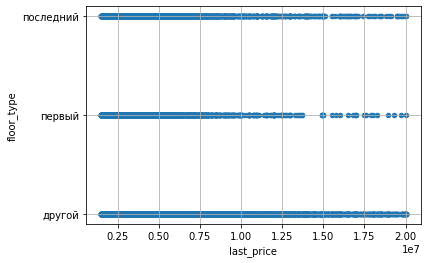

In [93]:
df_new.plot(x='last_price', y='floor_type', kind='scatter', grid=True)

<Axes: xlabel='floor_type'>

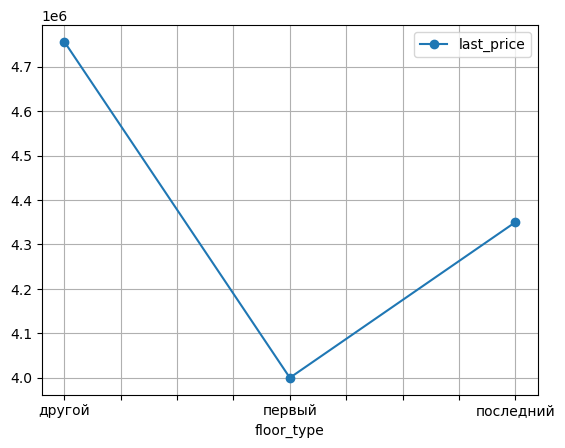

In [186]:
(
    df_new
    .pivot_table(
        index='floor_type', 
        values = 'last_price', 
        aggfunc = 'median')
    .plot(
        style='o-', 
        grid=True)
)

Распределение медианных значений может показать зависимость в следующем:
первый этаж ценять меньше всего
Последний этаж ценится выше чем первый
Но больше всего предпочитают этажи кроме первого и последнего

### Влияние `day_week_pbl	month_pbl  	year_pbl` на `last_price`

print('Коэффициент Пирсона:',df_new['last_price'].corr(df_new['day_week_pbl']))
print('Коэффициент Пирсона:',df_new['last_price'].corr(df_new['month_pbl']))
print('Коэффициент Пирсона:',df_new['last_price'].corr(df_new['year_pbl']))

Зависимости этих характеристик нет

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера V1<a class="tocSkip"></h2>


<b>На доработку🤔:</b>
Еще раз изучи как применять коэффициент корреляции Пирсона и что он показывает. Корректно ли его применять к категориальным параметрам (все кроме площадей)? Данный коэффициент корреляции отражает только линейную зависимость, на него также могут влиять третьи скрытые переменные, сильно влияют также выбросы, а для категориальных переменных его использовать некорректно, для них используются другие методы, с которыми ты ознакомишься в дальнейшем.
    
Также вывод о зависимости нельзя делать только посмотрев на коэффициент корреляции (причины выше), всегда нужно анализировать график, поэтому для всех категориальных переменных посчитай сводные таблицы и по ним построй столбчатые или линейные диаграммы.

1) корреляция не устанавливают причинно-следственной связи
2) отсутствие линейной корреляции не означает отсутствие взаимосвязи. Возможно взаимосвязь есть, но она нелинейна.
3) Если речь идет о двух количественных переменных мы можем использовать коэффициент Пирсона, если речь идет о выявлении линейной зависимости


<Axes: xlabel='year_pbl'>

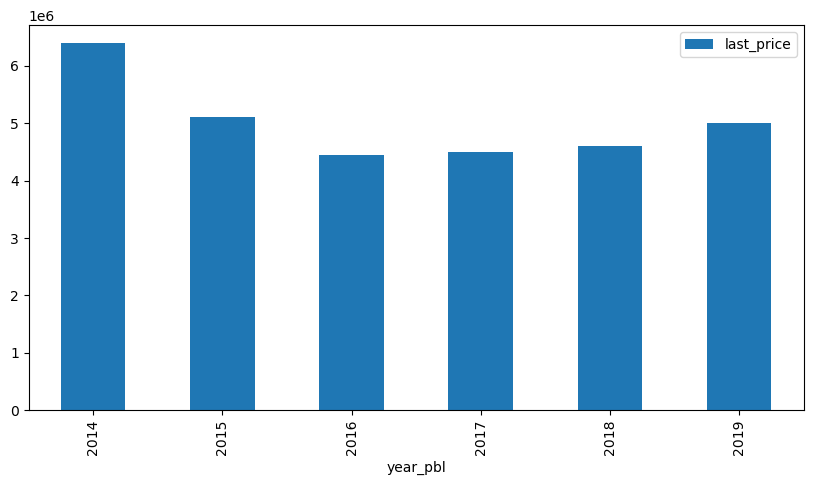

In [150]:
(
    df_new
    .pivot_table(
        index='year_pbl', 
        values = 'last_price', 
        aggfunc = 'median')
    .plot(
        y='last_price',
        kind='bar',
        figsize=(10,5))
)

<Axes: xlabel='year_pbl'>

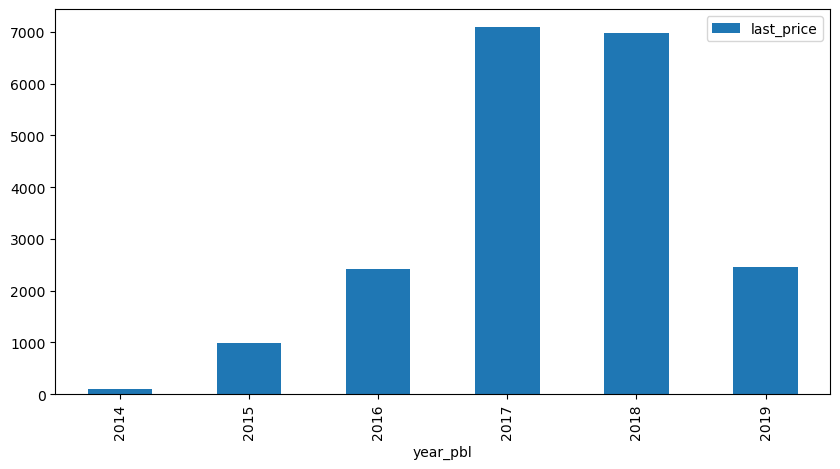

In [151]:
(
    df_new
    .pivot_table(
        index='year_pbl', 
        values = 'last_price', 
        aggfunc = 'count')
    .plot(
        y='last_price',
        kind='bar',
        figsize=(10,5))
)

<Axes: xlabel='year_pbl'>

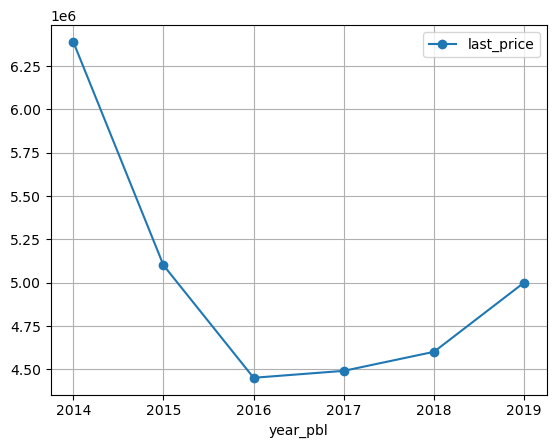

In [153]:
(
    df_new
    .pivot_table(
        index='year_pbl', 
        values = 'last_price', 
        aggfunc = 'median')
    .plot(
        style='o-', 
        grid=True)
)

<Axes: xlabel='month_pbl'>

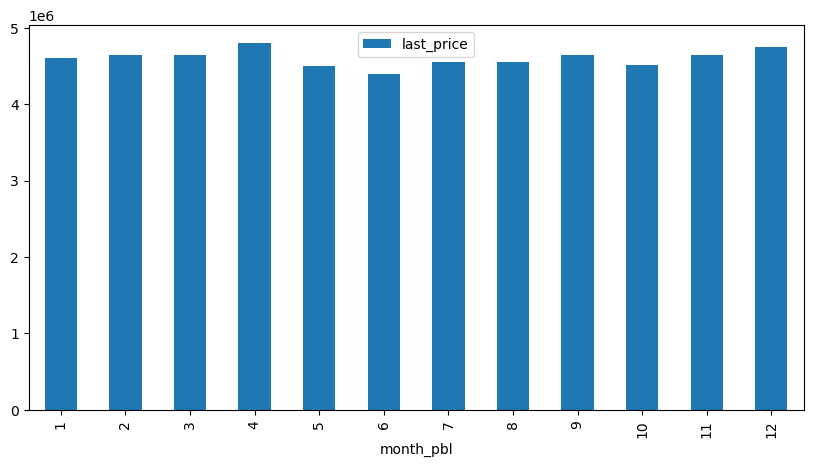

In [136]:
(
    df_new
    .pivot_table(
        index='month_pbl', 
        values = 'last_price', 
        aggfunc = 'median')
    .plot(
        y='last_price',
        kind='bar',
        figsize=(10,5))
)

<Axes: xlabel='month_pbl'>

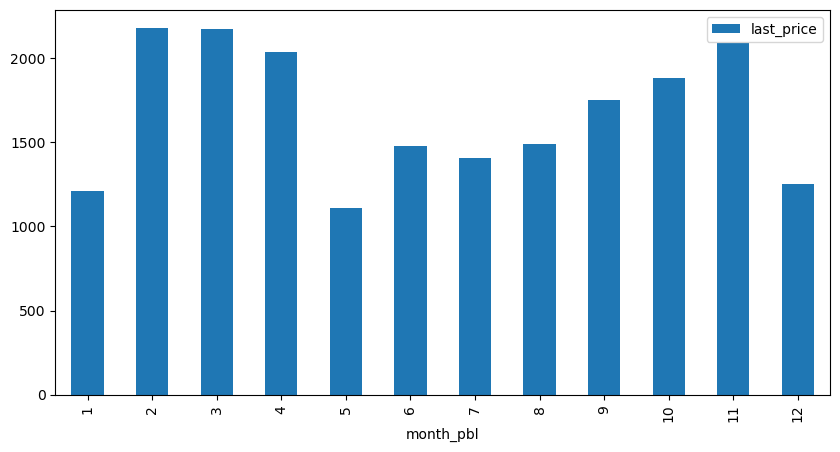

In [154]:
(
    df_new
    .pivot_table(
        index='month_pbl', 
        values = 'last_price', 
        aggfunc = 'count')
    .plot(
        y='last_price',
        kind='bar',
        figsize=(10,5))
)

<Axes: xlabel='month_pbl'>

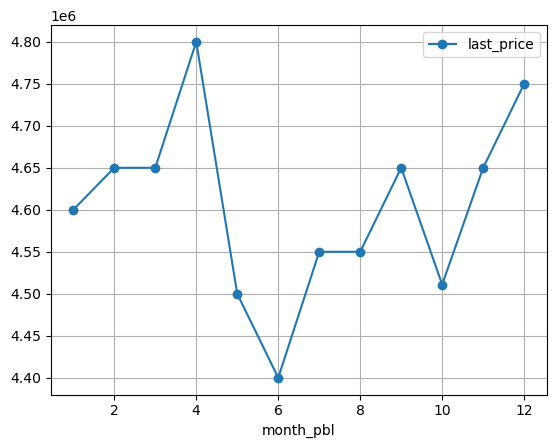

In [146]:
(
    df_new
    .pivot_table(
        index='month_pbl', 
        values = 'last_price', 
        aggfunc = 'median')
    .plot(
        style='o-', 
        grid=True)
)

<Axes: xlabel='day_week_pbl'>

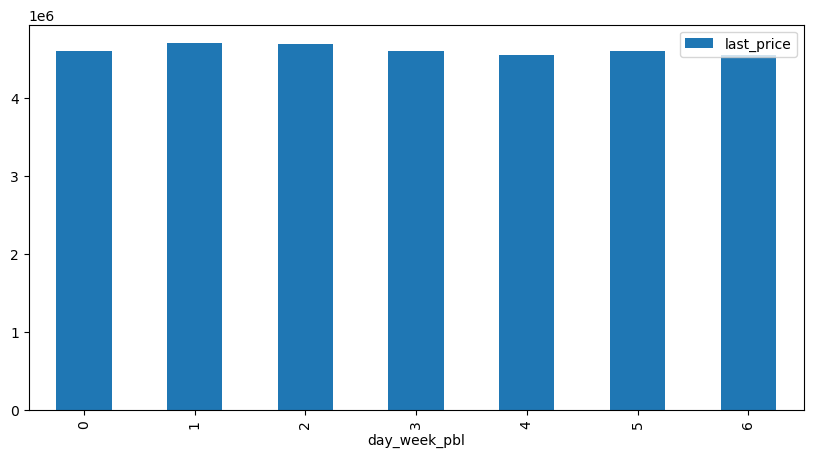

In [144]:
(
    df_new
    .pivot_table(
        index='day_week_pbl', 
        values = 'last_price', 
        aggfunc = 'median')
    .plot(
        y='last_price',
        kind='bar',
        figsize=(10,5))
)

<Axes: xlabel='day_week_pbl'>

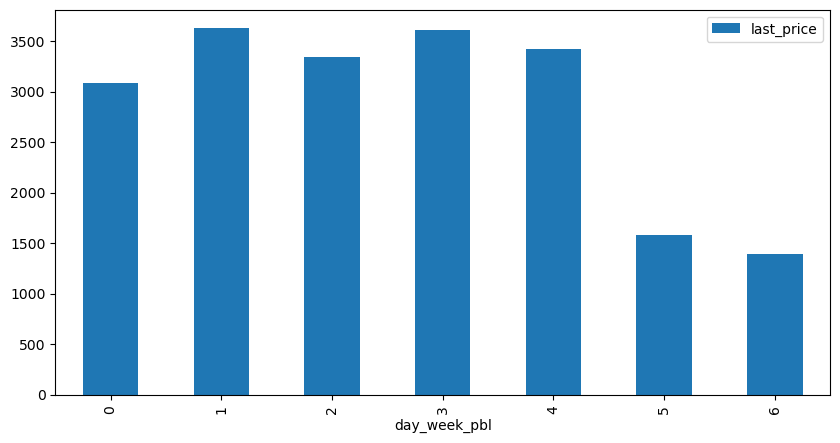

In [155]:
(
    df_new
    .pivot_table(
        index='day_week_pbl', 
        values = 'last_price', 
        aggfunc = 'count')
    .plot(
        y='last_price',
        kind='bar',
        figsize=(10,5))
)

<Axes: xlabel='day_week_pbl'>

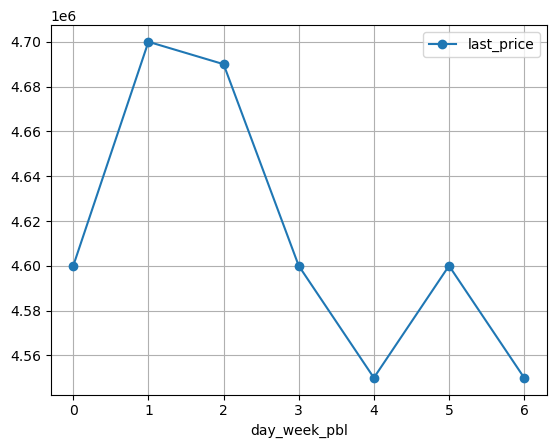

In [148]:
(
    df_new
    .pivot_table(
        index='day_week_pbl', 
        values = 'last_price', 
        aggfunc = 'median')
    .plot(
        style='o-', 
        grid=True)
)

### Вывод

`last_price` - цена обьекта на момент снятия публикации, я предпологая продажу обьекта

Группировка по таким показаталям как год, месяц и день недели. показывает медиану в цене в определенный период

Анализ показателя ГОД дает понять изменение цены в сторону уменьшения от 14-го года к 16-му году и небольшой рост до 2019 года
При этом хочу отметить что основные продажи по их количеству происходили в 17 и 18 годах в половину меньше в 15,16 и 19 и совсем мало в 2014 году. Тренд на увеличение стоимости жилья последние три года заметен.

Объеденив по месяцам продажи 6 лет набдюдается снижение активности в летние месяцы и менее заметные в октябре и январе. Пики как по количеству так и по цене в такие месяцы как Апрель и Декабрь.

Сравнивая за весь период продажи по дням недели, явно отслеживается деловая активность в буднии дни где пик по суммам сделок вторник и среда.


<div class="alert alert-info"> <b>Комментарий студента:</b>

Есть над чем подумать, это не просто написать что зависимоти от характеристик нет)) 

Не сообразил как циклом запустити эти постороения, это возможно?
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера V2<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Все правильно доработал. Да, можно в цикле вывести все, просто создать список, в нем параметры.

## Средняя цена одного квадратного метра

Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений — постройте сводную таблицу с количеством объявлений и средней ценой квадратного метра для этих населенных пунктов. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра.

top_10_locality = df_new['locality_name'].value_counts().head(10) #ТОп 10 населенных пунктов по количеству обьявлений
print(top_10_locality)
top_10_locality_name = top_10_locality.index.tolist() #список наименований топ10
top_10_locality_name

top_10 = df_new.query('locality_name in @top_10_locality_name') # срез по наименованию топ 10


вариант 1 решения

#группировка по общей площади
top_10_sum_m = top_10.pivot_table(index='locality_name', values='total_area', aggfunc='sum')
top_10_sum_m

#группировка по цене обьекта
top_10_sum_lp = top_10.pivot_table(index='locality_name', values='last_price', aggfunc='sum')
top_10_sum_lp

#перенести данные в одну таблицу
top_10_sum_m['last_price'] = top_10_sum_lp['last_price']
top_10_sum_m

#расчет средней стоимости квадратного метра
top_10_sum_m['mean_price_m'] = top_10_sum_m['last_price'] / top_10_sum_m['total_area']
top_10_sum_m.sort_values(by='mean_price_m', ascending=False)

Вариант 2

#группировка и ссумирование сразу по двум столбцам
top_10_1 = top_10.pivot_table(index='locality_name', values=['last_price','total_area'], aggfunc='sum')  
#расчет в новом столбце средней цены квадратного метра
top_10_1['mean_price_m'] = top_10_1['last_price']/top_10_1['total_area']
#сортировка по уменьшению
top_10_1 = top_10_1.sort_values(by='mean_price_m', ascending=False)
print(top_10_1)

Вариант 3

#группировка и сумирование сразу по двум столбцам
top_10_2 = df_new.pivot_table(index='locality_name', values=['last_price','total_area'], aggfunc=['sum', 'count'])  

#переименование столбцов
top_10_2.columns = ['sum_last_price', 'sum_total_area', 'count', 'column_2']
#расчет в новом столбце средней цены квадратного метра
top_10_2['mean_price_m'] = top_10_2['sum_last_price']/top_10_2['sum_total_area']
#сортировка по уменьшению
top_10_2 = top_10_2.sort_values(by='count', ascending=False)
print(top_10_2.head(10))
print()
print('Населённые пункты с самой высокой стоимостью квадратного метра:', top_10_2['mean_price_m'].head(1))
print()
print('Населённые пункты с самой низкой стоимостью квадратного метра:', top_10_2['mean_price_m'].tail(1))



<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера V1<a class="tocSkip"></h2>


<b>На доработку🤔:</b>
Ты создал ранее в пункте 3 столбец с ценой за метр квадратный. Тебе нужно просто посчитать сводную таблицу, в ней отразить для каждого населенного пункта количество объявлений и посчитать сразу среднюю цену за метр квадратный (это все можно сделать создав сводную таблицу, то есть указать несколько столбцов для значений и к каждому столбцу применить свою функцию агрегации).
    
Оставь только 1 вариант, предложенный выше.
    
В явном виде ответь на вопрос этого пункта в отдельной markdown ячейке, самую дорогую и дешевую стоимость просят указать именно среди топ-10 населенных пунктов по количеству объявлений.

In [188]:
#группировка, сумирование и подсчет
top_10 = df_new.pivot_table(
    index='locality_name', 
    values='price_one_meter', 
    aggfunc=['mean', 'count'])
#переименование столбцов
top_10.columns = ['mean_price', 'count']
#сортировка по уменьшению
top_10 = top_10.sort_values(by='count', ascending=False)
top_10 = top_10.head(10)
display(top_10)
print()
print('Населённые пункты с самой высокой стоимостью квадратного метра:', top_10['mean_price'].head(1))
print()
print('Населённые пункты с самой низкой стоимостью квадратного метра:', top_10['mean_price'].tail(1))

,mean_price,count
locality_name,,
Санкт-Петербург,108142.76,13548
поселок Мурино,86163.85,486
поселок Шушары,78689.00,399
Всеволожск,67603.02,364
Колпино,75249.78,327
Пушкин,102550.70,326
поселок Парголово,90549.62,300
Гатчина,69568.42,281
деревня Кудрово,92702.18,262



Населённые пункты с самой высокой стоимостью квадратного метра: locality_name
Санкт-Петербург   108142.76
Name: mean_price, dtype: float64

Населённые пункты с самой низкой стоимостью квадратного метра: locality_name
Петергоф   84001.76
Name: mean_price, dtype: float64


<div class="alert alert-success">
<h2> Комментарий ревьюера V2<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Все верно

## Квартиры в Санкт-Петербурге по отдаленности от центра

In [189]:
spb = df_new.query('locality_name == "Санкт-Петербург"') #создаю переменную с локацией только в СПБ 

In [190]:
spb = spb.pivot_table(
    index='city_centers_nearest_km', 
    values='last_price', aggfunc='mean')
spb.head(15)

,last_price
city_centers_nearest_km,
0.00,9027142.86
1.00,10055079.36
2.00,9658261.54
3.00,8676534.49
4.00,8972254.72
5.00,9031960.02
6.00,8277527.46
7.00,7898713.51
8.00,7754329.66


<AxesSubplot:title={'center':'График изменения средней цены для каждого километра от центра Петербурга'}, xlabel='city_centers_nearest_km'>

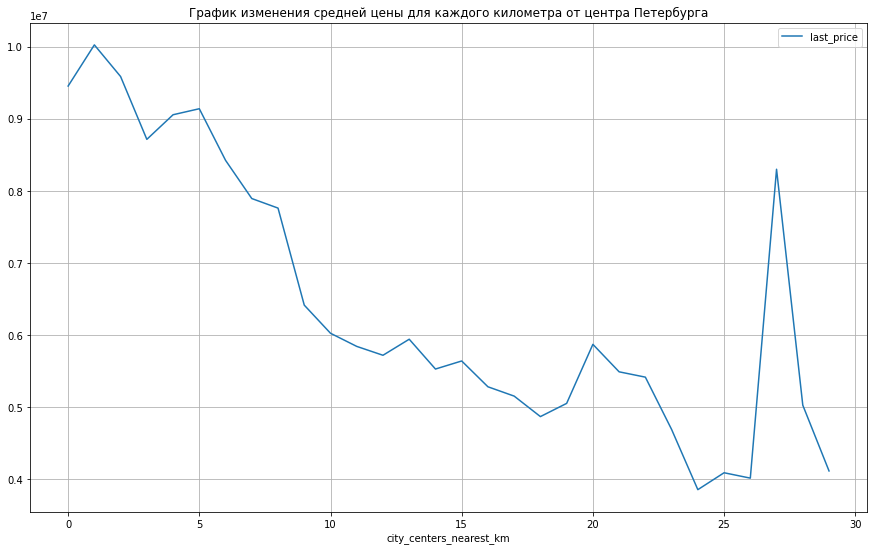

In [107]:
spb.plot(title='График изменения средней цены для каждого километра от центра Петербурга', 
        grid=True, 
        figsize=(15, 9), 
        )

На графике изменения средней цены при увеличении растояния от центра видно что стоимость недвижимости уменьшается.

При этом после 20 км линии я наблюдаю разброс данных что снова подтверждает наличие в этой области обьектов с низкой стоимостью пригородных поселений и элитных загородных обьектов в том числе которые могут быть на берегу акватории, для анализа этой группы необходима отдельное иследование.

Встречается отображение квартир студий, а может и комнат, их классификация ни как не обозначена и может смешиватся с Однокомнатными квартирами которые также имеют характеристику 1 комната.




<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Все так, прослеживается общая тенденция снижения цены при удалении от центра.

## Вывод

Рыночная стоимость обьектов недвижимости складывается из многоих факторов.
    
Изучили данные с 2014 по 2019 годы.

Исходный файл содержал пропуски. В зависимости от их влияния заполнил их разными методами либо удалил.

Тип данных потребвалось скорректировать для будущих расчетов.

Обнаружены и исправлены дубликаты в наименовании населенных пунктов, связанные с вариацией ввода вручную.

Добавлены дополнительные столбцы для последующего иследования.

Иследовательский анализ основных параметров скорректировал массив иследования на 8% от входных данных. Отсеяна информациа о сверх дорогой недвижимости, для её анализа требуется более детальный подход.

Можно сформировать портрет самых часто встречающихся объектов:
Стоимость: 4600000.00	
Общая площадь: 51.00
Высота потолков 2.50	
Этаж: 6
В 9-10 этажном доме


Встречаются не правдоподобные данные как по высоте потолков (1 и 100м) так и этажность строений (свыше 35 этажей), что может обуславливатся ошибкой.
При этом хочется отметить растояние от центра показывает населенный пункт Санкт_Петербург для обьектов пригорода или даже области, что может вводить в заблуждение.

Данные до ближайшего парка проанализировать сложно так так имеют множество пропусков, требуются дополнительные срезы с геосервисом. 

По скорости обычно продажа занимает от 82 до 125 дней, но если вы продаете более 497 дней то это уже слишком большой срок.


Цена на объекты зависит от таких факторов:
В большей степени это:
 - общей площади;
 
     Именно из общей площади складывается итоговая стоимость объекта, его ценность в количестве квадратных метров
     Больше всего продаж с площадью 25 - 40 м.кв.
     Изменение площади порпорционально меняет общую стоимость квартиры
     
 
 - жилой площади;
 
     Второй по значимости фактор площадь комнат для жизни.
     Самые многочисленные обьявления 18 м.кв
     
- количества комнат;
     Без условно важное значение, так каждая комната прибавляет к стоимости обьекта около 1 млн рублей.
 
в средней степени( на эти факторы обращают внимание после предыдущих):
 - площади кухни;
    Влияние на стоимость обекта больше просматривается до 20 м.кв. после же имеет факт совокупных характеристик
 - этажа, на котором расположена квартира (первый, последний, другой);
     оценивают ниже всего первые этажи, на 9% больше верхгий этаж и на 18% дольше относительно первого другие.
 
и интересные выводы:
 - даты размещения (день недели, месяц, год).
 
 Тренд на увеличение стоимости жилья за последние три года.
    Хороший рост в 2-3 раза относительно год к году до 2017г. Пиковые значения по размещению обьектов в 2017 и 2018 годах в 7000 обьявлений и к маю месяцу 2019 года результат менее 2,5 тысячь обьявлений возможен спад по году по количеству. Тенденция общего рынка или только приложения. требуется выяснение.
    
 Пики как по количеству так и по цене в такие месяцы как Апрель и Декабрь. разница в сумме может составлять до 400 т.р.
 Деловая активность в буднии дни где пик по суммам сделок вторник и среда. По количеству сделок в выходные в два раза меньше будней и сумма сделки в первой половине недели на 100т.р выше.
 
 При этом хочу отметить зависимость от отдаления от центра города, график "График изменения средней цены для каждого километра от центра Петербурга" наглядно показывает влияние каждого километра в отдалении на снижение стоимости недвижимости. 
    В диапазоне отдаленности 1 км стоимость недвижимости в среднем 10млн.р. на растояниии уже 5 км уже 9 млн.р. а на растоянии 10 км на 40% ниже около 6 млн.р.
 
 
 Факт что средняя стоимость кввдратного метра в петербурге 108 т.р это в три разо больше чем в селе Шум где 34 т.р стоит один квадратный метр жилья. А топ 10 замыкает Петергоф   84 т.р м.кв
 
 
 Город СанктПетербург и его окружающая обрасть богаты историческими местами рекреациоонными зонами, в которых находится более дорогая и элитная недвижимость анализ которой и представленность в приложении должна быть более широкой.
 
 Растояние до парков и центра расчитыватся и указыватся должно во всех обьявлениях для более детальной картины покупателей. 
 Еще качественный показатель может быть среднее время в пути до цунтра, тем самым более выгодно представить недвижимость в районе с удобными развязками и дорогами.
 
 

<div class="alert alert-warning">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Некоторые замечания и рекомендации💡:</b> В итоговом выводе нужно достаточно подробно написать основные пункты выявленных зависимостей. Стоит доработать вывод с учетом моих комментариев по ходу работы. В итоговом выводе также старайся оставлять рекомендации для последующих шагов. Например рекомендации, что можно обработать и проанализировать другие признаки, на что твоим коллегам стоить обратить внимание.

<div class="alert alert-success">
<h2> Комментарий ревьюера V2<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Отличный вывод, все четко, понятно и структурировано. Вывод в полной мере отражает существующие зависимости, и по нему можно принимать дальнейшие решения.
</div>

<div style="border:solid Chocolate 2px; padding: 40px">

**Общий вывод по проекту**

Спасибо за твой проект! Я уверен, что ты приложил все усилия, чтобы сделать этот проект. Это видно по твоей работе, а сформулированные выводы отражают, насколько успешно ты осваиваешь материал.

**Отмечу отдельные положительные моменты проекта🙂**:

* Ты полностью следовал всем этапам выполнения задания и справился почти со всем. Хорошая работа!
* Отдельно выделю некоторые выводы, которые ты смог сформулировать абсолютно точно!
* У тебя опрятный и читаемый код. Возможно это звучит банально, однако при работе с чужим кодом это крайне важно)


**На что стоит обратить внимание🤓**:

* Важно доработать итоговый вывод.
* Нужно скорректировать анализ зависимости цены от категориальных параметров.
* Остальные рекомендации ты найдешь в моих комментариях!


**Желаю удачи и жду твой проект на повторное ревью!**😉

<div class="alert alert-info"> <b>Комментарий студента:</b> и правда вывод худенький)) 
</div>

<div style="border:solid Chocolate 2px; padding: 40px">

Ты отлично справился с данной работой! Видно, как ты успешно осваиваешь материал, применяешь полученные знания на практике. Мне было очень приятно проверять твою работу, надеюсь, мои комментарии и советы были для тебя полезными.

**Желаю удачи в последующем обучении и исследованиях!**😉